# TP 2

## Objectifs

1.  Tracer des graphiques en utilisant [matplotlib](https://matplotlib.org/api/pyplot_api.html)
2.  Lecture et tracé d'histogrammes d'images
3.  Travailler avec les algorithmes de [regroupement](http://scikit-learn.org/stable/modules/clustering.html) (KMeans, MiniBatchKMeans)
4.  Segmentation d'image et évaluation des clusters

## Prérequis

- Complétion du [TP 0](../TP0/tp0.ipynb) et du [TP 1](../TP1/tp1.ipynb)
- Compréhension de base des concepts de visualisation de données

## Aperçu des exercices

| Exercice | Difficulté | Sujets |
|----------|------------|--------|
| Exercice 1 | ★ | Bases de Matplotlib, graphiques linéaires et à barres |
| Exercice 2 | ★ | Manipulation d'images, histogrammes, canaux de couleur |
| Exercice 3 | ★★ | Clustering KMeans sur les images |
| Exercice 4 | ★★ | Comparaison KMeans vs MiniBatchKMeans |
| Exercice 5 | ★★★ | Visualisation 3D, segmentation d'image, méthode du coude |

## Exercise 1 \[★\]

[matplotlib](https://matplotlib.org/stable/api/pyplot_summary.html) peut être utilisé pour tracer des graphiques. Vous trouverez ci-dessous un code très simple avec seulement des valeurs x. Après avoir importé la bibliothèque *matplotlib*, nous initialisons les valeurs de x et nous traçons le graphique.



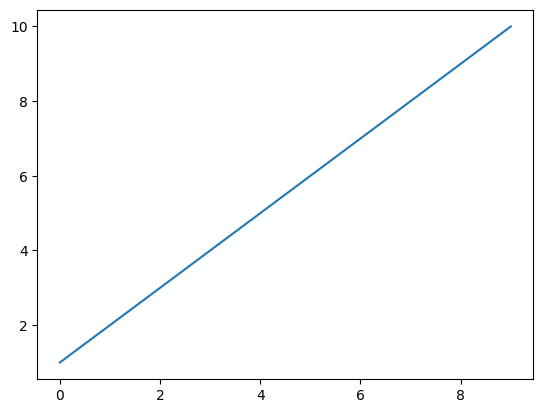

In [1]:
import matplotlib.pyplot as plot

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plot.plot(x)
plot.show()

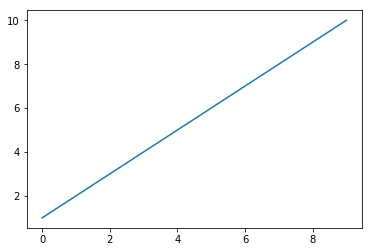



Modifions maintenant la couleur, le style et la largeur de la ligne.

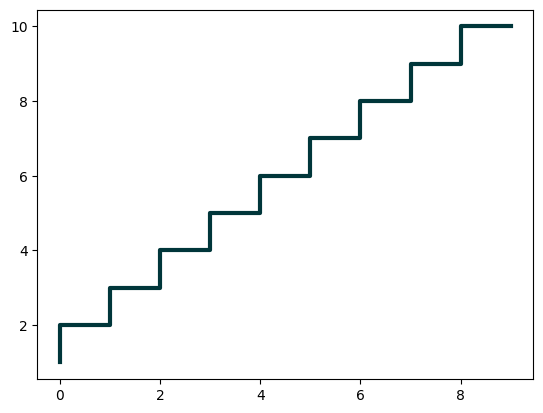

In [2]:
import matplotlib.pyplot as plot

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plot.plot(x, linewidth=3, drawstyle="steps", color="#00363a")
plot.show()

Nous allons maintenant initialiser les valeurs y et tracer le graphique.

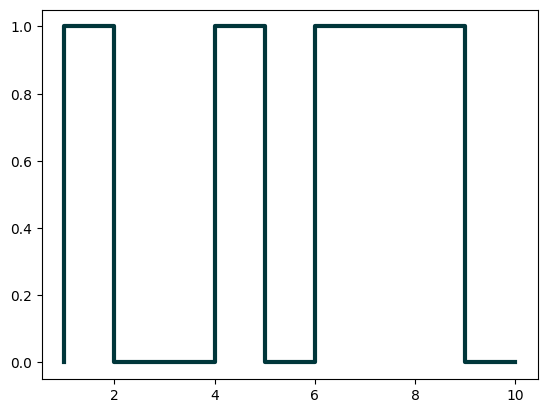

In [3]:
import matplotlib.pyplot as plot

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
y = [0, 1, 0, 0, 1, 0, 1, 1, 1, 0]
plot.plot(x, y, linewidth=3, drawstyle="steps", color="#00363a")
plot.show()

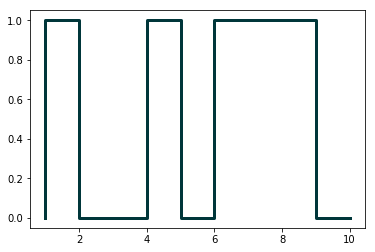



Lors de la [première séance pratique](../TP1/tp1.ipynb), nous avons vu comment analyser les fichiers JSON. En continuant avec le même fichier [JSON](../../data/pl.json), nous allons maintenant représenter graphiquement  les résultats
du nombre de langages de programmation publiés par an. Vérifiez le résultat.

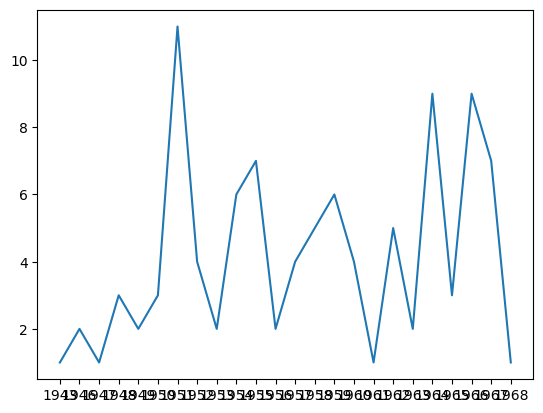

In [4]:
from pandas import json_normalize
import pandas as pd
import json
import matplotlib.pyplot as plot

data = json.load(open("../../data/pl.json"))
dataframe = json_normalize(data)
grouped = dataframe.groupby("year").count()
plot.plot(grouped)
plot.show()

Le programme suivant ajoutera le titre et les étiquettes à l'axe des x et à l'axe des y.

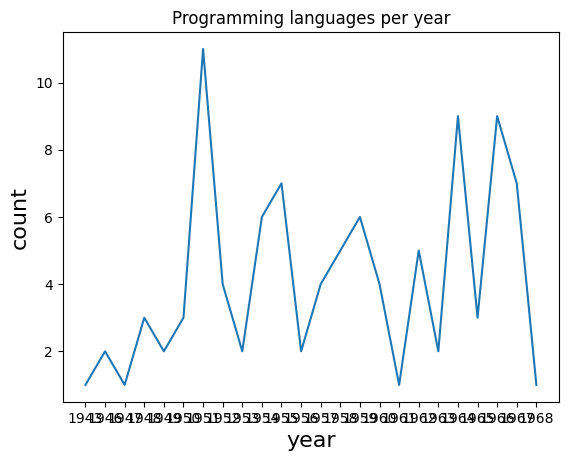

In [5]:
from pandas import json_normalize
import pandas as pd
import json
import matplotlib.pyplot as plot

data = json.load(open("../../data/pl.json"))
dataframe = json_normalize(data)
grouped = dataframe.groupby("year").count()
plot.plot(grouped)
plot.title("Programming languages per year")
plot.xlabel("year", fontsize=16)
plot.ylabel("count", fontsize=16)
plot.show()

Il existe encore une autre façon de tracer les 'dataframes', en utilisant
[pandas.DataFrame.plot](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html).



<Axes: title={'center': 'Programming languages per year'}, xlabel='year'>

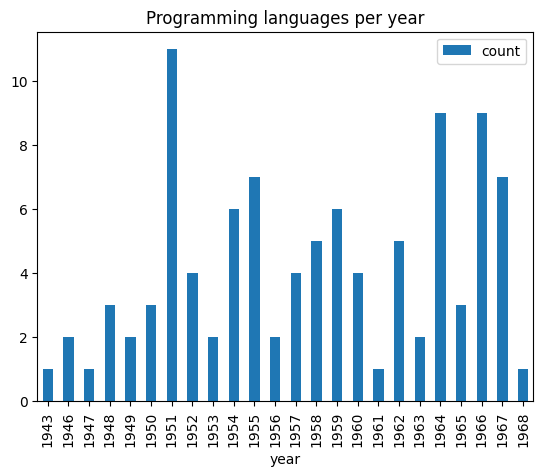

In [6]:
from pandas import json_normalize
import pandas as pd
import json
import matplotlib.pyplot as plot

data = json.load(open("../../data/pl.json"))
dataframe = json_normalize(data)
grouped = dataframe.groupby("year").count()
grouped = grouped.rename(columns={"languageLabel": "count"}).reset_index()
grouped.plot(x=0, kind="bar", title="Programming languages per year")

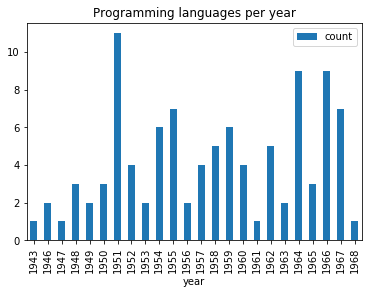

Maintenant, nous voulons créer plusieurs sous-images. Une méthode simple est donnée ci-dessous.
Rappelons que lors de la [première séance pratique](../TP1/tp1.ipynb), nous avons regroupé par
sur plusieurs colonnes. Des sous-parcelles peuvent être utilisées pour visualiser ces données.



In [7]:
!pip install pandas --upgrade

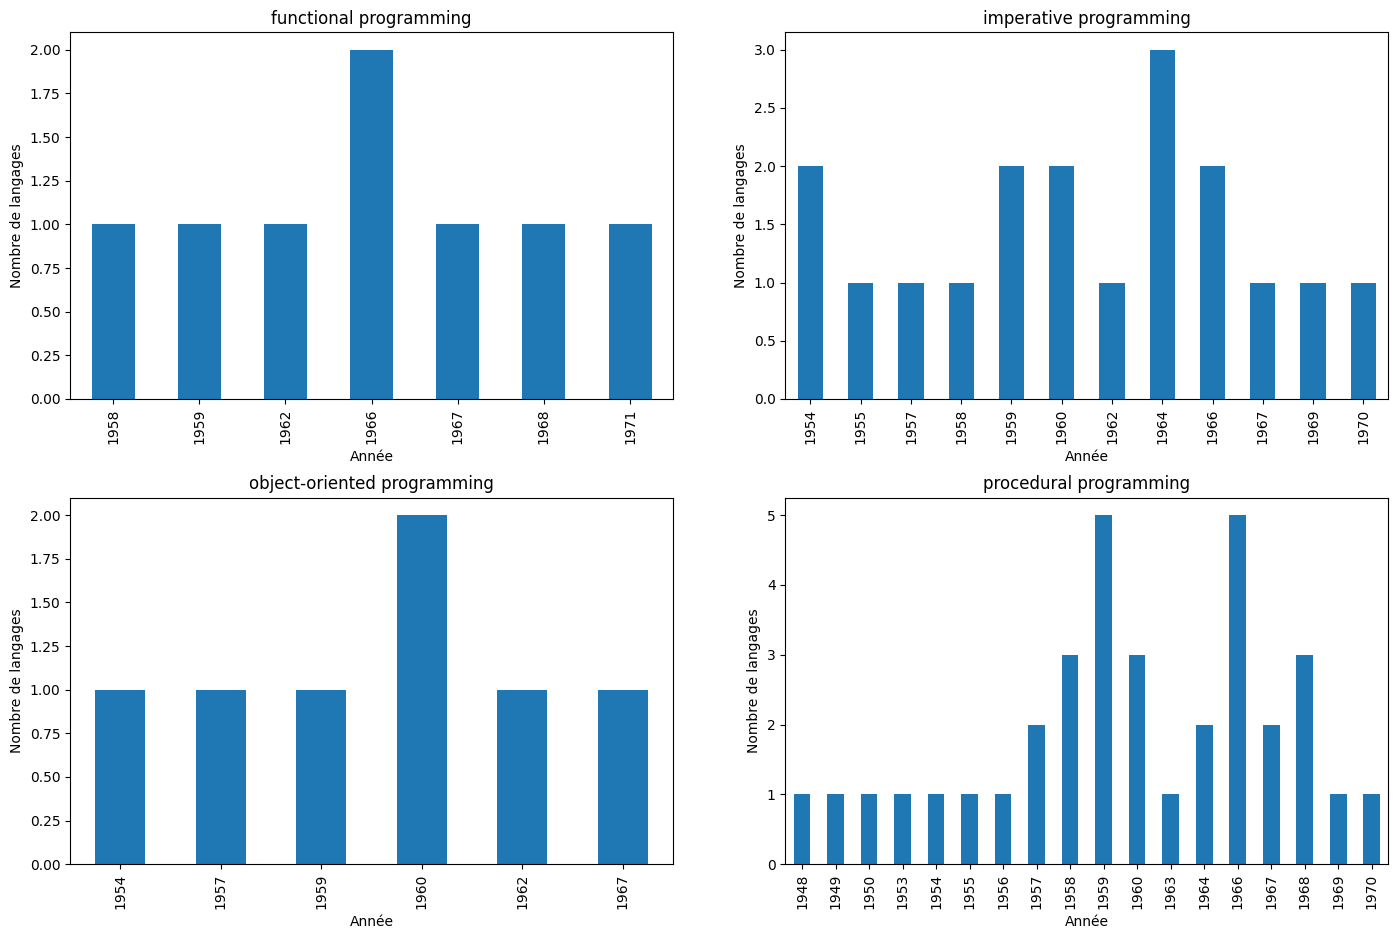

In [8]:
from pandas import json_normalize
import pandas as pd
import json
import math
import matplotlib.pyplot as plot

# Chargement des données
# Assurez-vous que le chemin vers le fichier est correct
try:
    jsondata = json.load(open("../../data/plparadigm.json"))
except FileNotFoundError:
    # Fallback si le fichier n'est pas trouvé (pour l'exemple)
    print("Fichier non trouvé, assurez-vous que le chemin est correct.")
    jsondata = []

array = []
for data in jsondata:
    # On vérifie que les clés existent pour éviter les erreurs
    if "year" in data and "languageLabel" in data and "paradigmLabel" in data:
        array.append([data["year"], data["languageLabel"], data["paradigmLabel"]])

dataframe = pd.DataFrame(array, columns=["year", "languageLabel", "paradigmLabel"])

# Conversion des types
dataframe = dataframe.astype(
    dtype={"year": "int64", "languageLabel": "string", "paradigmLabel": "string"}
)

# --- MODIFICATION PRINCIPALE ---
# On filtre pour ne garder que les paradigmes pertinents pour l'analyse
# Cela permet de répondre à la question sur l'évolution comparée de ces styles
paradigmes_a_analyser = [
    "imperative programming", 
    "object-oriented programming", 
    "functional programming", 
    "procedural programming"
]

dataframe = dataframe[dataframe["paradigmLabel"].isin(paradigmes_a_analyser)]
# -------------------------------

grouped = dataframe.groupby(["paradigmLabel", "year"]).count()
grouped = grouped.rename(columns={"languageLabel": "count"})
grouped = grouped.groupby("paradigmLabel")

# Initialisation des sous-graphiques (subplots)
# On adapte la taille dynamiquement, mais (15, 10) est suffisant pour 4 graphiques
nr = math.ceil(grouped.ngroups / 2)
fig, axes = plot.subplots(nrows=nr, ncols=2, figsize=(15, 10))

# Ajustement de l'espace entre les graphiques
fig.tight_layout(pad=5.0)

# Création des sous-graphiques
for i, group in enumerate(grouped.groups.keys()):
    g = grouped.get_group(group).reset_index()
    
    # Gestion des axes pour les subplots (ligne, colonne)
    ax = axes[math.floor(i / 2), i % 2]
    
    g.plot(
        x="year", 
        y="count", 
        kind="bar", 
        title=group, 
        ax=ax,
        legend=False # On enlève la légende interne pour clarté
    )
    
    # Amélioration de l'affichage des axes
    ax.set_ylabel("Nombre de langages")
    ax.set_xlabel("Année")

plot.show()

**Question 1**  

Modifiez le code ci-dessus afin d'obtenir une représentation visuelle du nombre de langages de programmation, selon différents paradigmes, publiés chaque année. Autrement dit, pour chaque année disponible, affichez le nombre de langages de programmation appartenant à chaque paradigme.

**Question 2**  

Détecter les années de pic de création de langages :  
- Identifiez les 5 années ayant le plus grand nombre de nouveaux langages de programmation.  
- Représentez ces années sur un graphique en mettant en évidence les barres correspondantes.

**Question 3: Personnalisation et sauvegarde des graphiques**

Améliorez votre graphique à barres avec un style professionnel :
1. Ajoutez des lignes de grille (utilisez `plt.grid(True, axis='y', alpha=0.3)`)
2. Faites pivoter les étiquettes de l'axe x de 45 degrés pour une meilleure lisibilité
3. Ajoutez un titre descriptif et des étiquettes d'axe avec des tailles de police appropriées
4. Utilisez une palette de couleurs au lieu des couleurs par défaut
5. Enregistrez le graphique en fichier PNG haute résolution :

```python
plt.savefig('languages_per_year.png', dpi=300, bbox_inches='tight')
```

**Bonus:** Créez une fonction `save_styled_plot(data, filename)` qui applique toutes ces personnalisations et enregistre le graphique.

Les 5 années avec le plus grand nombre de nouveaux langages :
year
1966    7
1959    5
1964    5
1967    4
1968    4
Name: languageLabel, dtype: int64


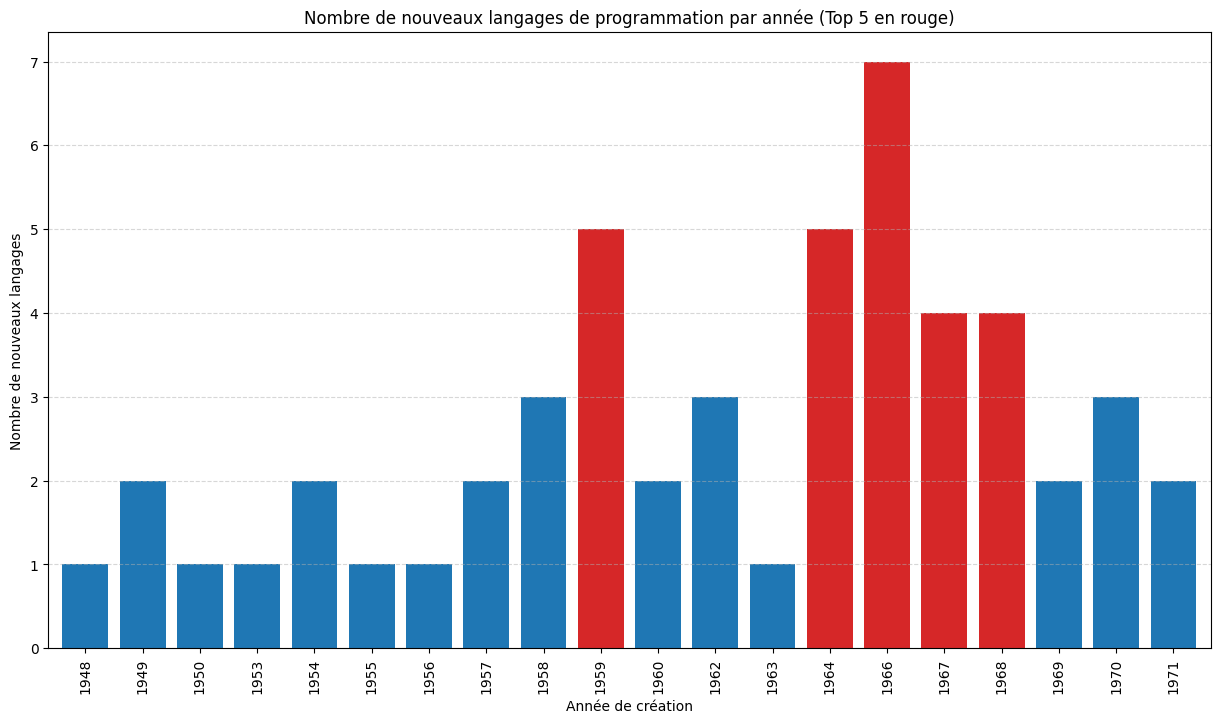

In [9]:
import pandas as pd
import matplotlib.pyplot as plot
import json

# 1. Chargement des données
# On recharge le fichier pour travailler sur l'ensemble des données
jsondata = json.load(open("../../data/plparadigm.json"))

# 2. Préparation des données
# On ne garde que l'année et le nom pour compter les langages uniques
array = []
for data in jsondata:
    # Vérification de sécurité
    if "year" in data and "languageLabel" in data:
        array.append([data["year"], data["languageLabel"]])

df_lang = pd.DataFrame(array, columns=["year", "languageLabel"])

# Conversion de l'année en numérique
df_lang["year"] = pd.to_numeric(df_lang["year"], errors='coerce')
df_lang = df_lang.dropna(subset=["year"])
df_lang["year"] = df_lang["year"].astype(int)

# 3. Calcul du nombre de nouveaux langages par an
# On utilise nunique() pour compter chaque langage une seule fois par an 
# (même s'il apparaît plusieurs fois à cause de ses multiples paradigmes)
languages_per_year = df_lang.groupby("year")["languageLabel"].nunique()

# 4. Identification du Top 5
top_5_years = languages_per_year.nlargest(5)
print("Les 5 années avec le plus grand nombre de nouveaux langages :")
print(top_5_years)

# 5. Création du graphique avec mise en évidence
plot.figure(figsize=(15, 8))

# On définit la couleur : ROUGE pour le top 5, BLEU pour le reste
colors = ['#d62728' if year in top_5_years.index else '#1f77b4' for year in languages_per_year.index]

# Tracé du diagramme à barres
languages_per_year.plot(kind='bar', color=colors, width=0.8)

# Mise en forme
plot.title("Nombre de nouveaux langages de programmation par année (Top 5 en rouge)")
plot.xlabel("Année de création")
plot.ylabel("Nombre de nouveaux langages")
plot.grid(axis='y', linestyle='--', alpha=0.5) # Grille horizontale légère

plot.show()

Sauvegarde du graphique dans languages_per_year.png...


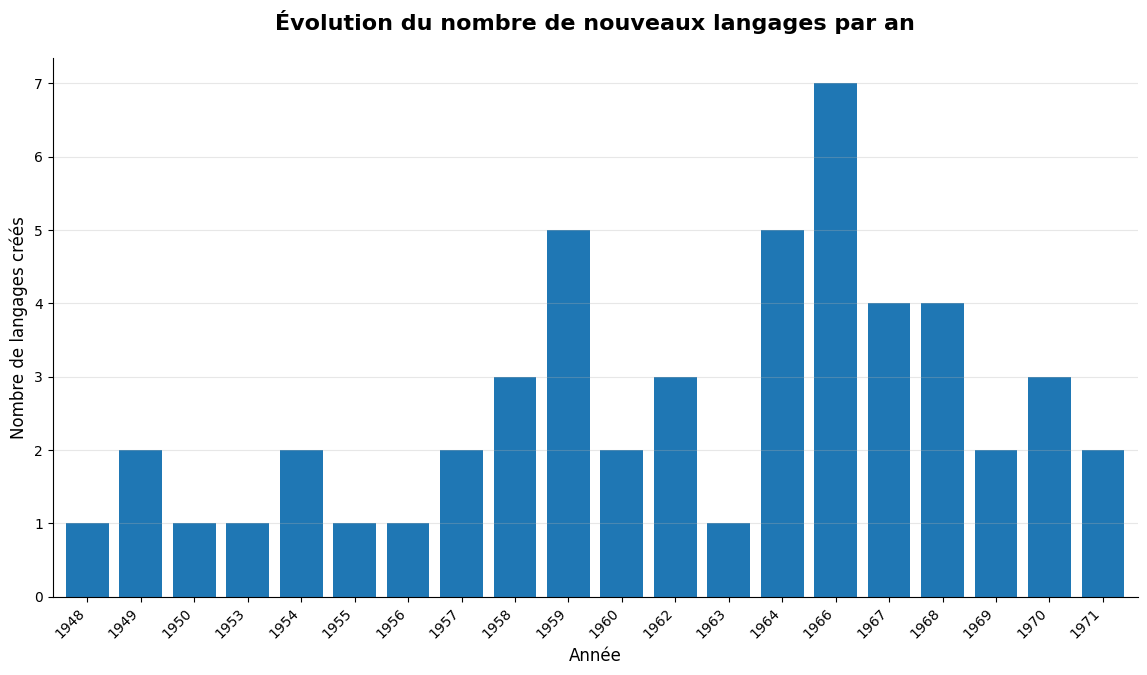

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np

# --- 1. Préparation des données (Rappel de l'étape précédente) ---
# On s'assure d'avoir les données prêtes
try:
    jsondata = json.load(open("../../data/plparadigm.json"))
    array = [[d["year"], d["languageLabel"]] for d in jsondata if "year" in d and "languageLabel" in d]
    df_lang = pd.DataFrame(array, columns=["year", "languageLabel"])
    df_lang["year"] = pd.to_numeric(df_lang["year"], errors='coerce').dropna().astype(int)
    # Compte les langages uniques par an
    languages_per_year = df_lang.groupby("year")["languageLabel"].nunique()
except FileNotFoundError:
    print("Erreur: Fichier plparadigm.json non trouvé.")
    # Données simulées pour que le code fonctionne quand même
    languages_per_year = pd.Series([10, 20, 15, 30, 45, 25, 10], index=[1990, 1995, 2000, 2005, 2010, 2015, 2020])

# --- 2. Fonction demandée (Bonus) ---
def save_styled_plot(data, filename):
    """
    Crée un graphique stylisé à partir des données et le sauvegarde.
    Arguments:
        data: Une Série Pandas (Index=Années, Valeurs=Nombre)
        filename: Le nom du fichier de sortie (ex: 'graphique.png')
    """
    # Création de la figure avec une taille adaptée
    plt.figure(figsize=(14, 7))


    # Tracé du graphique
    # On utilise l'objet 'ax' pour avoir un contrôle fin
    ax = data.plot(kind='bar', width=0.8)

    # 1. Ajout de la grille (demandé)
    plt.grid(True, axis='y', alpha=0.3)

    # 2. Rotation des étiquettes (demandé)
    plt.xticks(rotation=45, ha='right')

    # 3. Titres et étiquettes avec tailles de police (demandé)
    plt.title("Évolution du nombre de nouveaux langages par an", fontsize=16, fontweight='bold', pad=20)
    plt.xlabel("Année", fontsize=12)
    plt.ylabel("Nombre de langages créés", fontsize=12)

    # Suppression des bordures inutiles (haut et droite) pour le style "pro"
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

    # 5. Sauvegarde en haute résolution (demandé)
    print(f"Sauvegarde du graphique dans {filename}...")
    plt.savefig(filename, dpi=300, bbox_inches='tight')
    
    # Affichage
    plt.show()

# --- 3. Appel de la fonction ---
save_styled_plot(languages_per_year, 'languages_per_year.png')

## Exercice 2 \[★\]

Dans cet exercice, nous allons travailler sur les images. Téléchargez une image (par ex,
[image.bmp](../../images/picture.bmp) et [flower.jpg](../../images/flower.jpg)) dans votre dossier et ouvrez-la de la manière suivante. Nous allons d'abord essayer de d'obtenir quelques métadonnées de l'image.

In [11]:
import os, sys
from PIL import Image

imgfile = Image.open("../../images/picture.bmp")
print(imgfile.size, imgfile.format)

(640, 480) BMP


Nous utilisons le module 'Image' de Python PIL
([Documentation](http://www.effbot.org/imagingbook/image.htm)). Nous allons essayez maintenant d'obtenir des données de 100 pixels à partir d'une image.

In [12]:
import os, sys
from PIL import Image

imgfile = Image.open("../../images/flower.jpg")
data = imgfile.getdata()
for i in range(10):
    for j in range(10):
        print(i, j, data.getpixel((i, j)))

0 0 (102, 94, 105)
0 1 (77, 69, 82)
0 2 (77, 70, 86)
0 3 (75, 71, 86)
0 4 (75, 71, 86)
0 5 (77, 71, 85)
0 6 (78, 70, 83)
0 7 (80, 70, 81)
0 8 (78, 70, 83)
0 9 (80, 69, 83)
1 0 (78, 70, 83)
1 1 (53, 45, 58)
1 2 (53, 46, 62)
1 3 (50, 46, 61)
1 4 (53, 46, 62)
1 5 (52, 46, 60)
1 6 (53, 45, 58)
1 7 (55, 45, 56)
1 8 (55, 44, 58)
1 9 (54, 43, 57)
2 0 (76, 70, 82)
2 1 (53, 45, 60)
2 2 (53, 45, 60)
2 3 (52, 46, 60)
2 4 (53, 47, 61)
2 5 (54, 46, 59)
2 6 (55, 44, 58)
2 7 (56, 44, 58)
2 8 (54, 44, 55)
2 9 (54, 42, 54)
3 0 (78, 72, 86)
3 1 (55, 47, 62)
3 2 (56, 48, 63)
3 3 (55, 47, 60)
3 4 (56, 48, 61)
3 5 (57, 46, 60)
3 6 (56, 45, 59)
3 7 (56, 44, 58)
3 8 (54, 42, 54)
3 9 (53, 41, 53)
4 0 (80, 74, 86)
4 1 (57, 49, 62)
4 2 (57, 49, 60)
4 3 (57, 49, 60)
4 4 (59, 49, 60)
4 5 (57, 47, 56)
4 6 (56, 44, 54)
4 7 (56, 43, 53)
4 8 (54, 41, 51)
4 9 (52, 39, 49)
5 0 (82, 76, 90)
5 1 (59, 51, 64)
5 2 (61, 50, 64)
5 3 (59, 49, 60)
5 4 (58, 48, 57)
5 5 (57, 45, 55)
5 6 (55, 43, 53)
5 7 (54, 41, 51)
5 8 (53, 40,

/var/folders/j1/vqrsy1tn5nxg1d7q8832tcmw0000gn/T/ipykernel_13408/3197699433.py:5: DeprecationWarning: Image.Image.getdata is deprecated and will be removed in Pillow 14 (2027-10-15). Use get_flattened_data instead.
  data = imgfile.getdata()


Vous pouvez remarquer la position et les valeurs des pixels (un tuple de 3 valeurs). Essayons d'obtenir des métadonnées supplémentaires sur les images, c'est-à-dire le mode de l'image (par exemple, RGB)), le nombre de bandes, le nombre de bits pour chaque bande, la largeur et la hauteur de l'image (en pixels).


In [13]:
import os, sys
from PIL import Image

imgfile = Image.open("../../images/flower.jpg")
print(imgfile.mode, imgfile.getbands(), imgfile.bits, imgfile.width, imgfile.height)

RGB ('R', 'G', 'B') 8 640 480


Nous pouvons également obtenir des informations supplémentaires sur les images, comme les informations EXIF (Exchangeable image file format). Dans certains cas, les informations EXIF des images sont supprimées (car elles peuvent contenir des informations privées).

In [14]:
import os, sys
from PIL import Image
from PIL.ExifTags import TAGS

imgfile = Image.open("../../images/flower.jpg")
exif_data = imgfile._getexif()

if exif_data:  # s'il existe des informations EXIF
    for tag, value in exif_data.items():
        if tag in TAGS:
            print(TAGS[tag], value)

ResolutionUnit 2
ExifOffset 204
Make Canon
Model Canon EOS 1100D
YResolution 72.0
Orientation 1
DateTime 2018:02:11 10:47:45
YCbCrPositioning 2
Copyright 
XResolution 72.0
Artist 
ExifVersion b'0230'
ComponentsConfiguration b'\x01\x02\x03\x00'
ShutterSpeedValue 6.375
DateTimeOriginal 2012:07:29 16:45:44
DateTimeDigitized 2012:07:29 16:45:44
ApertureValue 5.0
ExposureBiasValue 0.0
MeteringMode 5
UserComment b'\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00

Obtenons maintenant un histogramme des couleurs. Lorsque vous exécutez le code suivant, vous obtenez un tableau unique de valeurs, la fréquence de chaque bande (R, G, B etc.) concaténée ensemble. Dans le code suivant, nous supposerons que nous travaillons avec une image de 3 bandes (mode RGB) et que chaque bande est représentée par 8 bits. Nous allons tracer le [histogramme](http://www.effbot.org/imagingbook/image.htm#tag-Image.Image.histogram) de différentes couleurs.



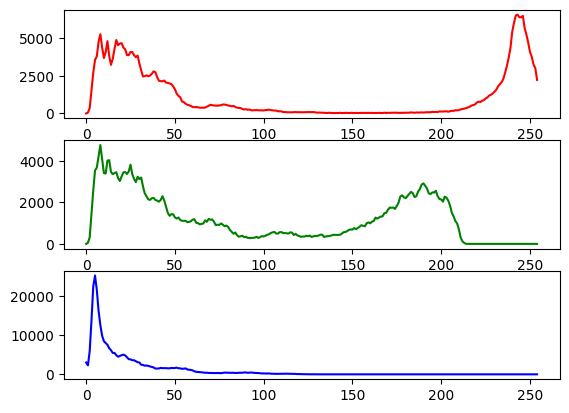

In [15]:
from PIL import Image
import matplotlib.pyplot as plot

imgfile = Image.open("../../images/flower.jpg")
histogram = imgfile.histogram()
# we have three bands (for this image)
red = histogram[0:255]
green = histogram[256:511]
blue = histogram[512:767]
fig, (axis1, axis2, axis3) = plot.subplots(nrows=3, ncols=1)
axis1.plot(red, color="red")
axis2.plot(green, color="green")
axis3.plot(blue, color="blue")
plot.show()

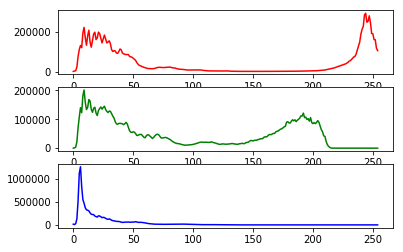

Mais si vous souhaitez les voir tous dans une seule image.



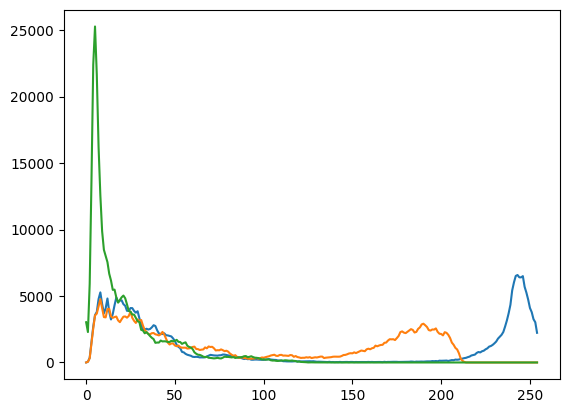

In [16]:
from PIL import Image
import matplotlib.pyplot as plot

imgfile = Image.open("../../images/flower.jpg")
histogram = imgfile.histogram()
red = histogram[0:255]
green = histogram[256:511]
blue = histogram[512:767]
x = range(255)
y = []
for i in x:
    y.append((red[i], green[i], blue[i]))
plot.plot(x, y)
plot.show()

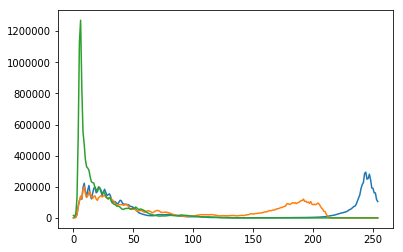

Mais nous ne voulons pas perdre les couleurs de la bande.



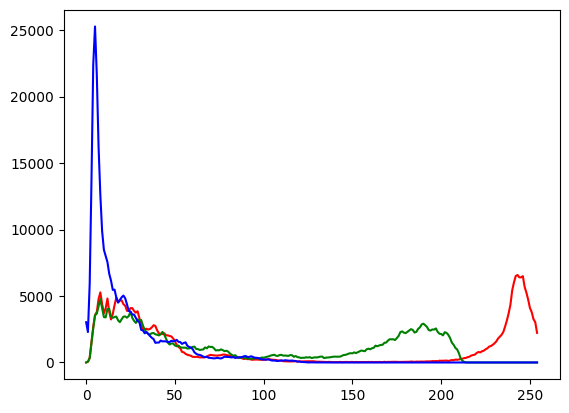

In [17]:
from PIL import Image
import matplotlib.pyplot as plot

imgfile = Image.open("../../images/flower.jpg")
histogram = imgfile.histogram()
red = histogram[0:255]
green = histogram[256:511]
blue = histogram[512:767]
x = range(255)
y = []
for i in x:
    y.append((red[i], green[i], blue[i]))
figure, axes = plot.subplots()
axes.set_prop_cycle("color", ["red", "green", "blue"])
plot.plot(x, y)
plot.show()

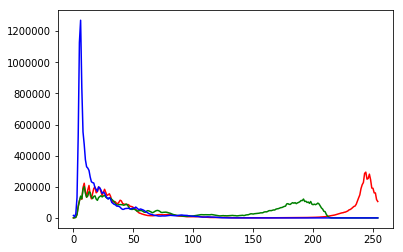

Visualisons la distribution spatiale des intensités de couleur à l'aide d'une carte thermique.

In [18]:
!pip install opencv-python seaborn

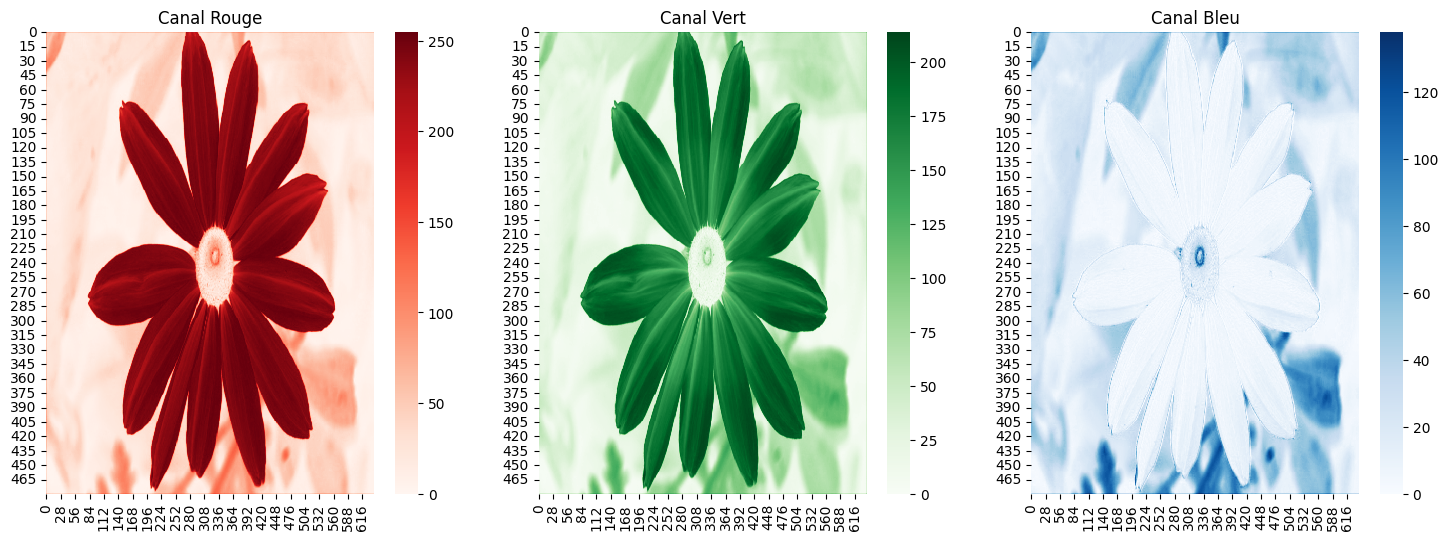

In [19]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger l'image
image = cv2.imread("../../images/flower.jpg")  # Remplacez par le chemin de votre image
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convertir de BGR à RGB

# Séparer les canaux
red_channel, green_channel, blue_channel = cv2.split(image)

# Tracer les cartes thermiques
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sns.heatmap(red_channel, cmap="Reds", ax=axes[0])
axes[0].set_title("Canal Rouge")

sns.heatmap(green_channel, cmap="Greens", ax=axes[1])
axes[1].set_title("Canal Vert")

sns.heatmap(blue_channel, cmap="Blues", ax=axes[2])
axes[2].set_title("Canal Bleu")

plt.show()


**Question 1**

Votre prochaine tâche consiste à obtenir les 20 plus grandes intensités dans chaque bande (R, G, B) et à créer un graphique unique de ces intensités maximales. Écrivez un programme Python qui peut réaliser cela.

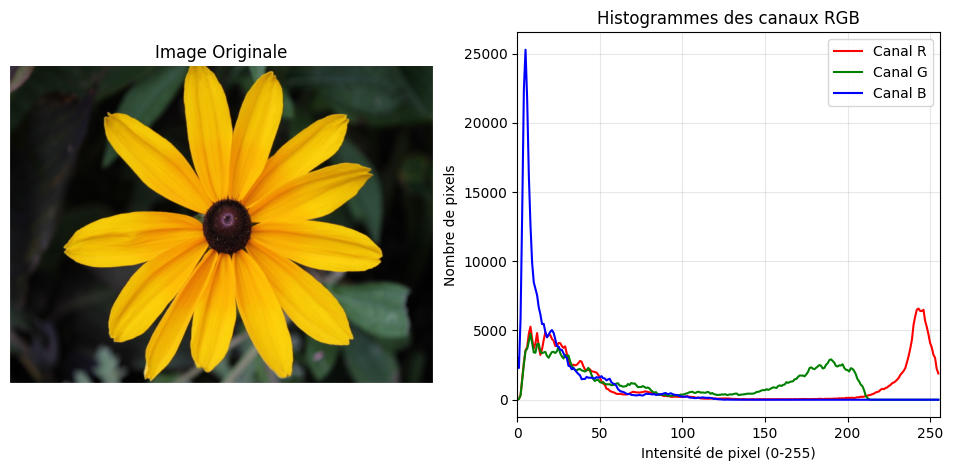

In [23]:
# 1. Chargement de l'image
# Assurez-vous que le chemin est correct (ex: "flower.jpg" ou "../../images/flower.jpg")
image_path = "../../images/flower.jpg" 
img = cv2.imread(image_path)
# 2. Conversion BGR (OpenCV) vers RGB (Matplotlib)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# 3. Préparation de l'affichage
plt.figure(figsize=(12, 5))

# --- Image ---
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title("Image Originale")
plt.axis('off')

# --- Histogrammes ---
plt.subplot(1, 2, 2)
colors = ('r', 'g', 'b')

# On calcule l'histogramme pour chaque canal (0=R, 1=G, 2=B dans img_rgb)
for i, color in enumerate(colors):
    # cv2.calcHist args: [images], [canal], masque, [taille], [plage]
    hist = cv2.calcHist([img_rgb], [i], None, [256], [0, 256])
    plt.plot(hist, color=color, label=f'Canal {color.upper()}')
    plt.xlim([0, 256])

plt.title("Histogrammes des canaux RGB")
plt.xlabel("Intensité de pixel (0-255)")
plt.ylabel("Nombre de pixels")
plt.legend()
plt.grid(alpha=0.3)

plt.show()

**Question 2**

#### Normalisation et égalisation de l'histogramme

Modifiez le programme de visualisation de l'histogramme pour appliquer une égalisation d'histogramme sur l'image avant de tracer l'histogramme. Comparez les histogrammes originaux et égalisés dans un sous-graphe.

**Astuce** : Utilisez `cv2.equalizeHist()` de OpenCV pour les images en niveaux de gris ou implémentez votre propre normalisation pour les images RGB.

/var/folders/j1/vqrsy1tn5nxg1d7q8832tcmw0000gn/T/ipykernel_13408/901395554.py:19: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(gray_img.ravel(), 256, [0, 256], color='gray')
/var/folders/j1/vqrsy1tn5nxg1d7q8832tcmw0000gn/T/ipykernel_13408/901395554.py:31: MatplotlibDeprecationWarning: Passing the range parameter of hist() positionally is deprecated since Matplotlib 3.10; the parameter will become keyword-only in 3.12.
  plt.hist(equ_img.ravel(), 256, [0, 256], color='black')


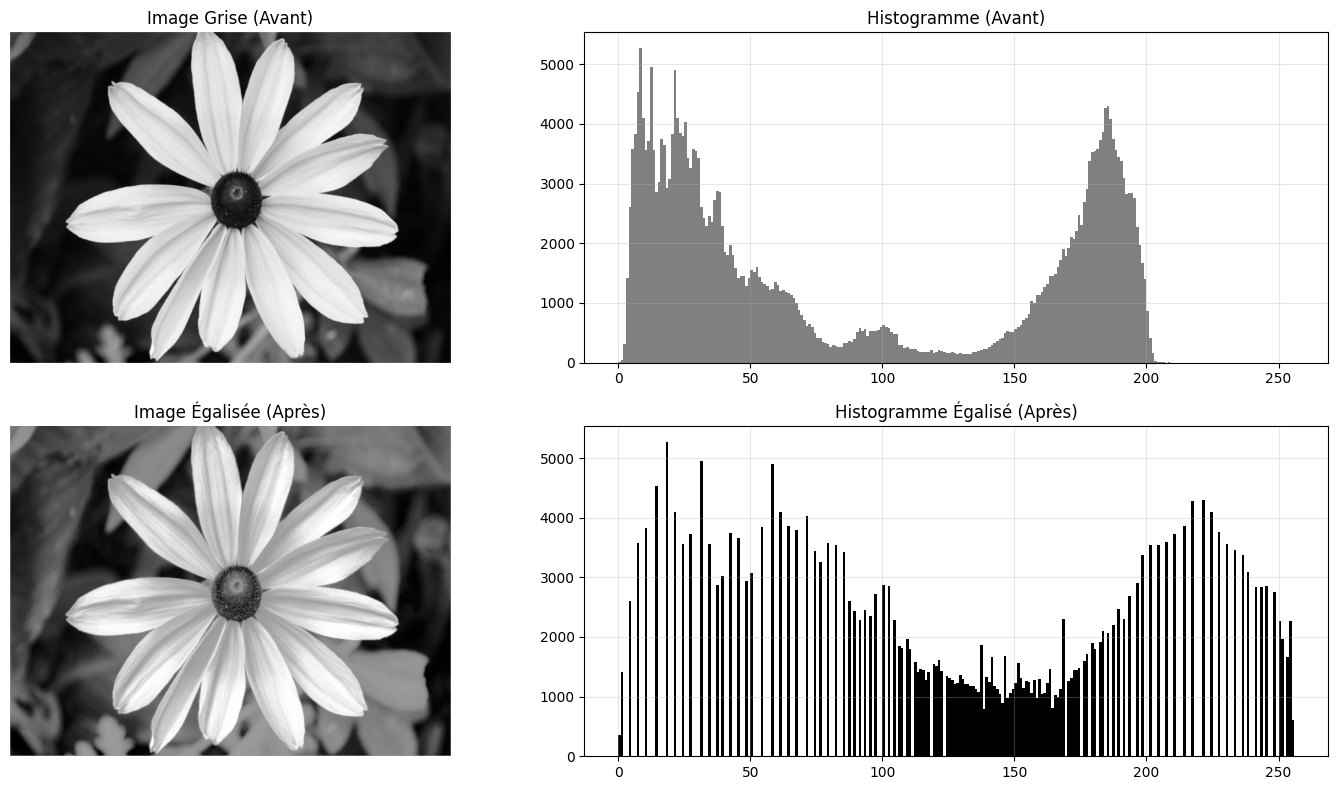

In [24]:
# On reprend l'image chargée précédemment
# 1. Conversion en niveaux de gris (nécessaire pour equalizeHist)
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 2. Application de l'égalisation
equ_img = cv2.equalizeHist(gray_img)

# 3. Affichage comparatif
plt.figure(figsize=(15, 8))

# Image Grise - Avant
plt.subplot(2, 2, 1)
plt.imshow(gray_img, cmap='gray')
plt.title("Image Grise (Avant)")
plt.axis('off')

# Histogramme - Avant
plt.subplot(2, 2, 2)
plt.hist(gray_img.ravel(), 256, [0, 256], color='gray')
plt.title("Histogramme (Avant)")
plt.grid(alpha=0.3)

# Image Grise - Après Égalisation
plt.subplot(2, 2, 3)
plt.imshow(equ_img, cmap='gray')
plt.title("Image Égalisée (Après)")
plt.axis('off')

# Histogramme - Après
plt.subplot(2, 2, 4)
plt.hist(equ_img.ravel(), 256, [0, 256], color='black')
plt.title("Histogramme Égalisé (Après)")
plt.grid(alpha=0.3)

plt.tight_layout()
plt.show()

## Exercice 3 \[★★\]

Dans cet exercice, nous examinerons [l'algorithme de regroupement KMeans](http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html). Nous l'utiliserons pour trouver les couleurs prédominantes dans une image.

### Paramètres clés de KMeans

| Paramètre | Description | Défaut |
|-----------|-------------|--------|
| `n_clusters` | Nombre de clusters à former | 8 |
| `n_init` | Nombre d'exécutions avec différentes graines de centroïdes | 10 |
| `max_iter` | Nombre maximum d'itérations par exécution | 300 |
| `random_state` | Graine pour la reproductibilité | None |

### Comment fonctionne KMeans

1. Initialiser aléatoirement K centres de clusters (centroïdes)
2. Assigner chaque point de données au centroïde le plus proche
3. Recalculer les centroïdes comme la moyenne des points assignés
4. Répéter les étapes 2-3 jusqu'à convergence

En continuant avec les images, nous allons maintenant trouver 4 couleurs prédominantes dans une image.

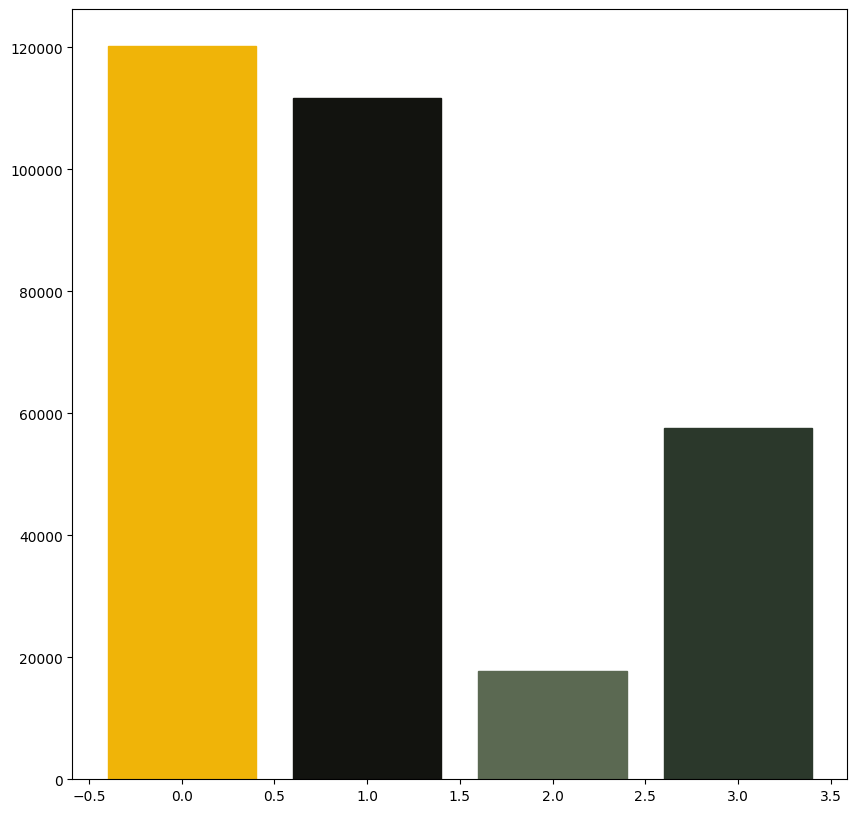

In [ ]:
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

imgfile = Image.open("../../images/flower.jpg")
numarray = numpy.array(imgfile.get_flattened_data(), numpy.uint8)
clusters = KMeans(n_clusters=4, n_init=2)
clusters.fit(numarray)
npbins = numpy.arange(0, 5)
histogram = numpy.histogram(clusters.labels_, bins=npbins)
labels = numpy.unique(clusters.labels_)
barlist = plot.bar(labels, histogram[0])
for i in range(4):
    barlist[i].set_color(
        "#%02x%02x%02x"
        % (
            math.ceil(clusters.cluster_centers_[i][0]),
            math.ceil(clusters.cluster_centers_[i][1]),
            math.ceil(clusters.cluster_centers_[i][2]),
        )
    )
plot.show()

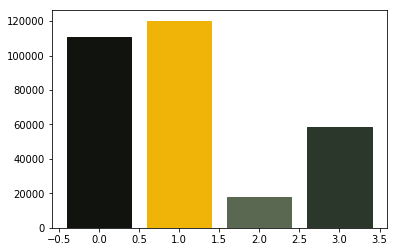

**Question 1**

Pour votre prochaine question, votre objectif est de comprendre le code ci-dessus et
réaliser ce qui suit :
1.  Supposer que le nombre de grappes est donné par l'utilisateur, généraliser
    le code ci-dessus.
2.  En cas de diagramme à barres, assurez-vous que les barres sont disposées dans le
    ordre décroissant de la fréquence des couleurs.
3.  Ajoutez également le support pour le graphique circulaire en plus du graphique en barres. Assurez-vous que
    que nous utilisons les couleurs de l'image comme les couleurs de la tranche. 
4.  Avez-vous des observations intéressantes ?

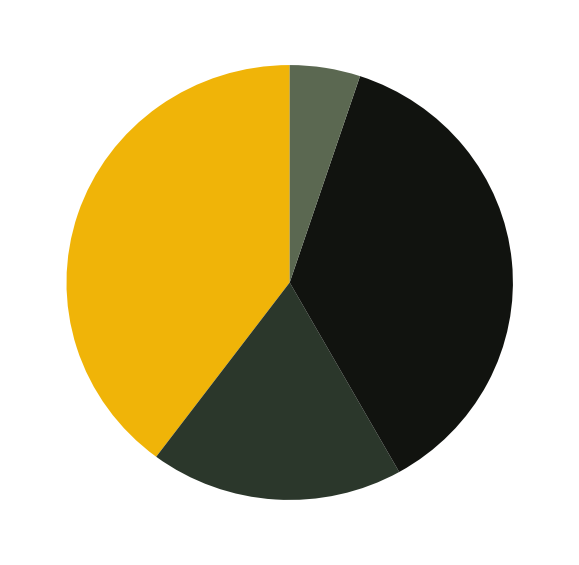



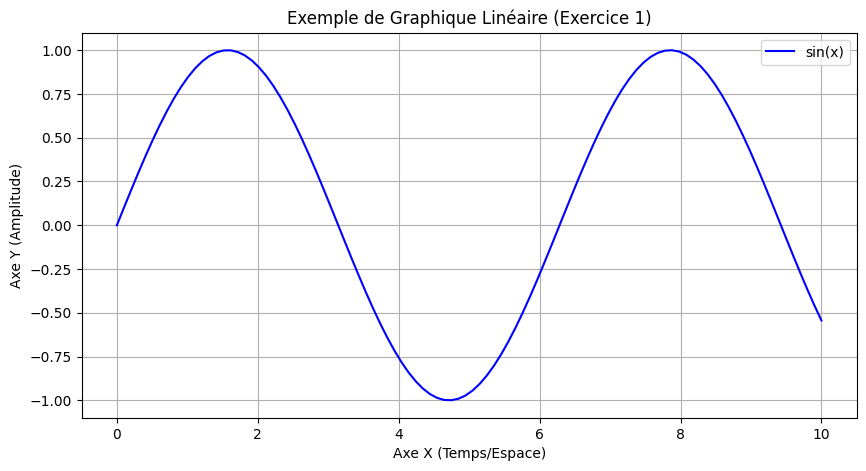

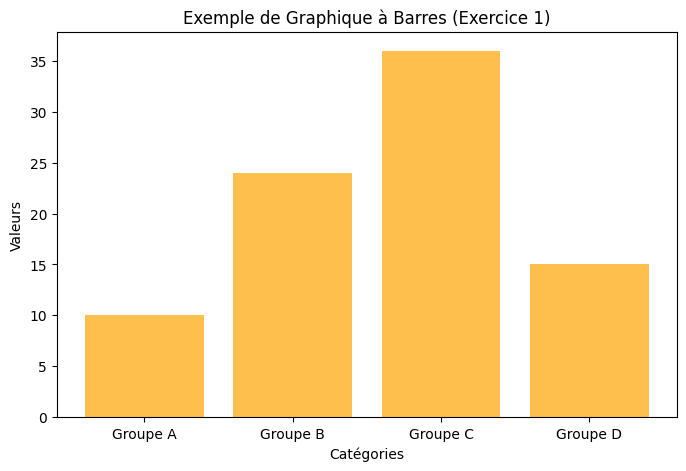

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# --- Partie 1 : Graphique Linéaire (Line Plot) ---

# 1. Création des données
# On génère 100 points entre 0 et 10
x = np.linspace(0, 10, 100) 
# On calcule le sinus de ces points (exemple classique de courbe)
y = np.sin(x) 

# 2. Tracé du graphique
plt.figure(figsize=(10, 5)) # Définit la taille de la figure
plt.plot(x, y, color='blue', linestyle='-', label='sin(x)')

# 3. Ajout des titres et légendes
plt.title("Exemple de Graphique Linéaire (Exercice 1)")
plt.xlabel("Axe X (Temps/Espace)")
plt.ylabel("Axe Y (Amplitude)")
plt.legend() # Affiche la légende définie dans plt.plot
plt.grid(True) # Ajoute une grille pour la lisibilité
plt.show() # Affiche le graphique


# --- Partie 2 : Graphique à Barres (Bar Chart) ---

# 1. Création des données
categories = ['Groupe A', 'Groupe B', 'Groupe C', 'Groupe D']
valeurs = [10, 24, 36, 15]

# 2. Tracé du graphique à barres
plt.figure(figsize=(8, 5))
plt.bar(categories, valeurs, color='orange', alpha=0.7)

# 3. Ajout des titres et légendes
plt.title("Exemple de Graphique à Barres (Exercice 1)")
plt.xlabel("Catégories")
plt.ylabel("Valeurs")
plt.show()

**Question 2**

Votre prochaine tâche consiste à configurer l'algorithme KMeans de différentes manières :

1. **Impact de l'initialisation des clusters :** L'algorithme `KMeans` utilise `n_init=2` dans le code donné. Comment le changement de la valeur de `n_init` affecte-t-il les résultats du regroupement ? Essayez différentes valeurs et discutez de vos observations.  

2. **Représentations alternatives des couleurs :** Le code utilise les valeurs RGB pour représenter les couleurs. Modifiez l'implémentation pour afficher les couleurs en utilisant un autre espace colorimétrique (par exemple, HSV ou LAB). Comment les résultats se comparent-ils à ceux obtenus avec RGB ?

**Question 3 : Extraction de palette de couleurs**

Créez une fonction réutilisable `extraire_palette(chemin_image, n_couleurs=5)` qui :
1. Charge une image et extrait les N couleurs prédominantes
2. Retourne les couleurs sous forme de liste de tuples RGB, triées par fréquence
3. Affiche la palette sous forme de barre horizontale

```python
def extraire_palette(chemin_image, n_couleurs=5):
    """Extraire la palette de couleurs d'une image"""
    # Votre implémentation ici
    pass

def afficher_palette(couleurs, frequences):
    """Afficher les couleurs sous forme de barres horizontales"""
    # Votre implémentation ici
    pass
```

Testez votre fonction sur 3 images différentes (par exemple, nature, portrait, art abstrait) et comparez :
- Quelle image a la palette la plus diversifiée ?
- Quelle image a la couleur unique la plus dominante ?

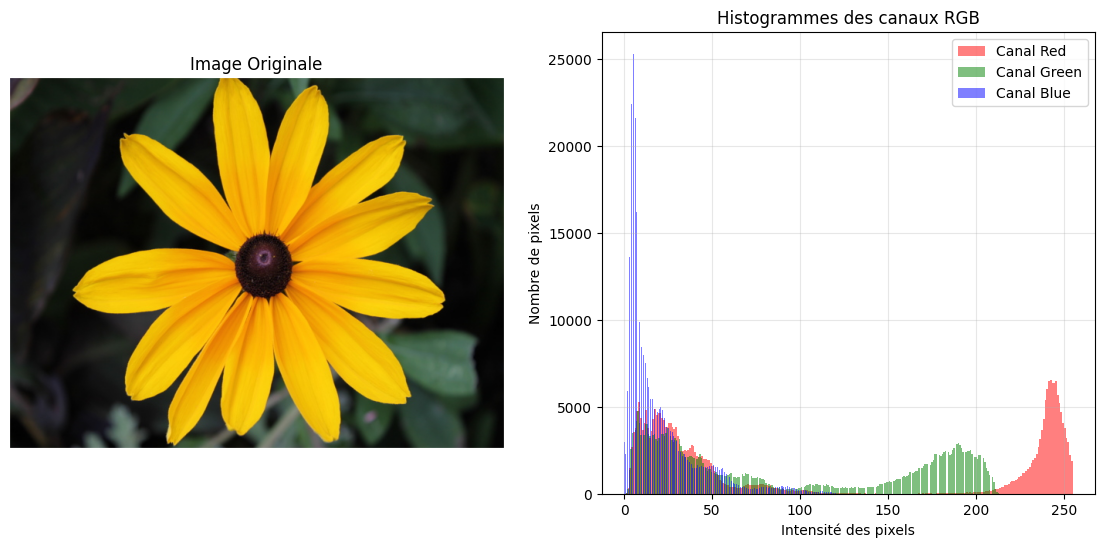

In [31]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg

# --- Étape 1 : Chargement de l'image ---
# Note : Remplacez 'votre_image.jpg' par le nom réel de votre fichier image (ex: 'lena.png')
# Si vous n'avez pas d'image, ce bloc 'try/except' créera une image aléatoire pour que le code fonctionne.
try:
    img = mpimg.imread('flower.jpg') 
except FileNotFoundError:
    print("Image non trouvée, génération d'une image aléatoire pour l'exemple.")
    img = np.random.rand(100, 100, 3) # Image aléatoire RGB

# --- Étape 2 : Affichage de l'image et des histogrammes ---
plt.figure(figsize=(14, 6))

# Partie Gauche : L'image elle-même
plt.subplot(1, 2, 1)
plt.imshow(img)
plt.title("Image Originale")
plt.axis('off') # Cache les axes pour une vue plus propre

# Partie Droite : Les histogrammes des 3 canaux (R, G, B)
plt.subplot(1, 2, 2)
colors = ['red', 'green', 'blue']
channel_ids = [0, 1, 2] # 0=Rouge, 1=Vert, 2=Bleu

for channel_id, color in zip(channel_ids, colors):
    # On extrait les données du canal spécifique
    histogram_data = img[:, :, channel_id]
    
    # .ravel() aplatit la matrice 2D en une liste 1D, nécessaire pour plt.hist
    plt.hist(histogram_data.ravel(), bins=256, color=color, alpha=0.5, label=f'Canal {color.title()}')

plt.title("Histogrammes des canaux RGB")
plt.xlabel("Intensité des pixels")
plt.ylabel("Nombre de pixels")
plt.legend()
plt.grid(True, alpha=0.3)

plt.show()

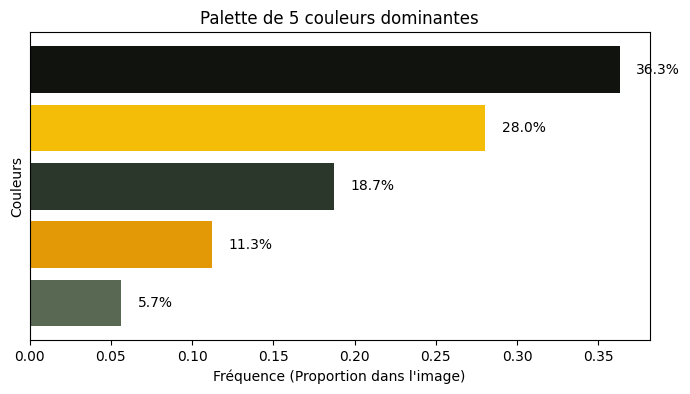

In [36]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.image as mpimg

def extraire_palette(chemin_image, n_couleurs=5):
    """
    Extraire la palette de couleurs d'une image en utilisant KMeans.
    
    Retourne:
        couleurs: Les centres des clusters (valeurs RGB)
        frequences: La proportion de chaque couleur dans l'image
    """
    # 1. Chargement de l'image
    try:
        img = mpimg.imread(chemin_image)
    except FileNotFoundError:
        print(f"Erreur : L'image '{chemin_image}' est introuvable.")
        return None, None

    # Normalisation si nécessaire (0-255 -> 0-1)
    # Matplotlib gère les png en 0-1 et les jpg parfois en 0-255
    if img.dtype == np.uint8:
        img = img / 255.0

    # On ignore le canal alpha (transparence) si présent (ex: image RGBA)
    if img.shape[2] > 3:
        img = img[:, :, :3]

    # 2. Reshape de l'image pour KMeans (pixels en lignes)
    w, h, d = img.shape
    pixels = img.reshape((w * h, d))

    # 3. Clustering KMeans
    kmeans = KMeans(n_clusters=n_couleurs, random_state=42, n_init=10)
    kmeans.fit(pixels)

    # 4. Calcul des fréquences
    # On compte combien de pixels appartiennent à chaque cluster
    etiquettes = kmeans.labels_
    n_pixels = len(etiquettes)
    counts = np.bincount(etiquettes)
    frequences = counts / n_pixels

    # Les couleurs sont les centres des clusters
    couleurs = kmeans.cluster_centers_

    return couleurs, frequences

def afficher_palette(couleurs, frequences):
    """
    Afficher les couleurs sous forme de barres horizontales.
    La largeur de la barre représente la fréquence de la couleur.
    """
    if couleurs is None:
        return

    # Tri des couleurs par fréquence décroissante pour un affichage plus joli
    indices_tries = np.argsort(frequences)[::-1]
    couleurs_triees = couleurs[indices_tries]
    frequences_triees = frequences[indices_tries]

    plt.figure(figsize=(8, 4))
    
    # Création des positions pour les barres (0, 1, 2...)
    positions = range(len(frequences_triees))
    
    # Tracé des barres horizontales
    # L'argument 'color' accepte directement nos valeurs RGB normalisées
    plt.barh(positions, frequences_triees, color=couleurs_triees, height=0.8)
    
    # Esthétique
    plt.title(f"Palette de {len(couleurs)} couleurs dominantes")
    plt.xlabel("Fréquence (Proportion dans l'image)")
    plt.ylabel("Couleurs")
    plt.yticks([]) # On cache les numéros sur l'axe Y car la couleur suffit
    plt.gca().invert_yaxis() # La couleur la plus fréquente en haut
    
    # Affichage des pourcentages à droite des barres
    for i, freq in enumerate(frequences_triees):
        plt.text(freq + 0.01, i, f"{freq*100:.1f}%", va='center')

    plt.show()

# --- Exemple d'utilisation (Main) ---

# Remplacez par le chemin de votre image
chemin = 'flower.jpg' 

# Appel des fonctions
couleurs, frequences = extraire_palette(chemin, n_couleurs=5)

if couleurs is not None:
    afficher_palette(couleurs, frequences)

## Exercise 4 \[★★\]

Nous allons essayer d'obtenir plus de clusters et de vérifier le temps pris par chacun de ces algorithmes.
Commençons par quelques exercices très simples pour expérimenter l'algorithme KMeans. Considérez les données suivantes et visualisez-les sur un nuage de points à l'aide d'un diagramme de dispersion.

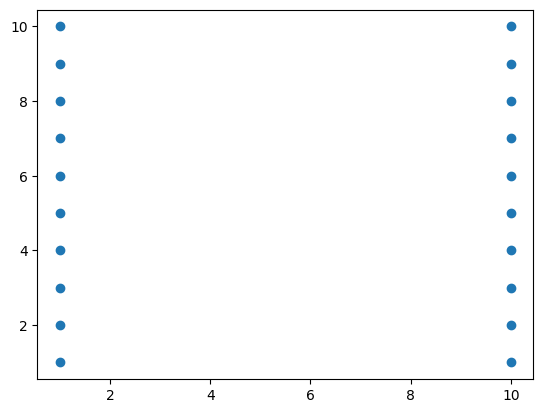

In [37]:
import numpy as np
import matplotlib.pyplot as plot

numarray = np.array(
    [
        [1, 1],
        [1, 2],
        [1, 3],
        [1, 4],
        [1, 5],
        [1, 6],
        [1, 7],
        [1, 8],
        [1, 9],
        [1, 10],
        [10, 1],
        [10, 2],
        [10, 3],
        [10, 4],
        [10, 5],
        [10, 6],
        [10, 7],
        [10, 8],
        [10, 9],
        [10, 10],
    ]
)

plot.scatter(numarray[:, 0], numarray[:, 1])
plot.show()

Visuellement, il est assez évident qu'il y a deux groupes. Mais utilisons l'algorithme KMeans pour obtenir les 2 clusters. Nous allons d'abord voir les étiquettes de nos données regroupées.

In [38]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

numarray = np.array(
    [
        [1, 1],
        [1, 2],
        [1, 3],
        [1, 4],
        [1, 5],
        [1, 6],
        [1, 7],
        [1, 8],
        [1, 9],
        [1, 10],
        [10, 1],
        [10, 2],
        [10, 3],
        [10, 4],
        [10, 5],
        [10, 6],
        [10, 7],
        [10, 8],
        [10, 9],
        [10, 10],
    ]
)

clusters = KMeans(n_clusters=2, n_init=2)
clusters.fit(numarray)
print(clusters.labels_)

[0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1]


Maintenant, nous allons visualiser les groupes à l'aide d'un nuage de points. Nous utiliserons
deux couleurs pour les distinguer visuellement.

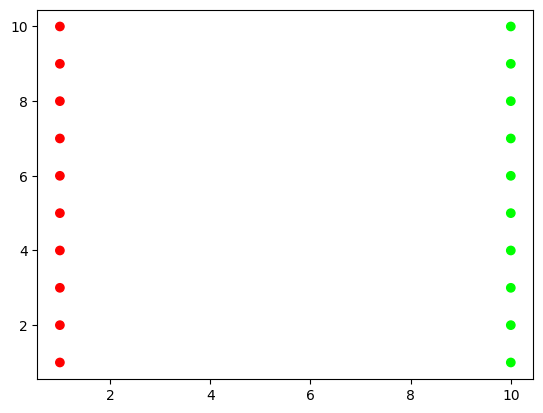

In [39]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

numarray = np.array(
    [
        [1, 1],
        [1, 2],
        [1, 3],
        [1, 4],
        [1, 5],
        [1, 6],
        [1, 7],
        [1, 8],
        [1, 9],
        [1, 10],
        [10, 1],
        [10, 2],
        [10, 3],
        [10, 4],
        [10, 5],
        [10, 6],
        [10, 7],
        [10, 8],
        [10, 9],
        [10, 10],
    ]
)

clusters = KMeans(n_clusters=2, n_init=2)
clusters.fit(numarray)
colors = np.array(["#ff0000", "#00ff00"])

plot.scatter(numarray[:, 0], numarray[:, 1], c=colors[clusters.labels_])
plot.show()

Et si nous essayions d'obtenir 4 clusters ? Essayez d'exécuter le code suivant, plusieurs fois. Des observations ? Essayez de changer la valeur de *n_init* avec des valeurs plus élevées.

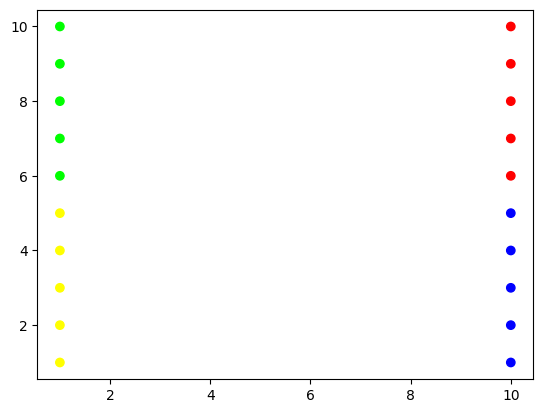

In [40]:
import numpy as np
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

numarray = np.array(
    [
        [1, 1],
        [1, 2],
        [1, 3],
        [1, 4],
        [1, 5],
        [1, 6],
        [1, 7],
        [1, 8],
        [1, 9],
        [1, 10],
        [10, 1],
        [10, 2],
        [10, 3],
        [10, 4],
        [10, 5],
        [10, 6],
        [10, 7],
        [10, 8],
        [10, 9],
        [10, 10],
    ]
)

clusters = KMeans(n_clusters=4, n_init=2)
clusters.fit(numarray)
colors = np.array(["#ff0000", "#00ff00", "#0000ff", "#ffff00"])

plot.scatter(numarray[:, 0], numarray[:, 1], c=colors[clusters.labels_])
plot.show()

Nous allons maintenant essayer d'obtenir des clusters avec des données réelles (référence : [citypopulation.json](../../data/citypopulation.json), Source : Wikidata). Il contient des informations concernant différentes villes du monde : nom de la ville, année de sa fondation et sa population en l'année 2010. Dans le code suivant, nous voulons regrouper les données sur la population et d'observer s'il y a une corrélation entre l'âge et la les statistiques de la population (2010). Dans le code suivant, il y a un ligne commentée. Vous pouvez le décommenter pour essayer avec une population différente les chiffres. Des observations ? Pourquoi avons-nous utilisé LabelEncoder ? Quelle est sa but ?

0                   Lahti
1              São Carlos
2          Campina Grande
3           Murska Sobota
4                Columbus
              ...        
437     Heroica Matamoros
438        Embu das Artes
439              Mirassol
440    Diadema, São Paulo
441               Resende
Name: cityLabel, Length: 442, dtype: str
0      188
1      348
2       56
3      227
4       80
      ... 
437    138
438    109
439    219
440    100
441    288
Name: cityLabel, Length: 442, dtype: int64


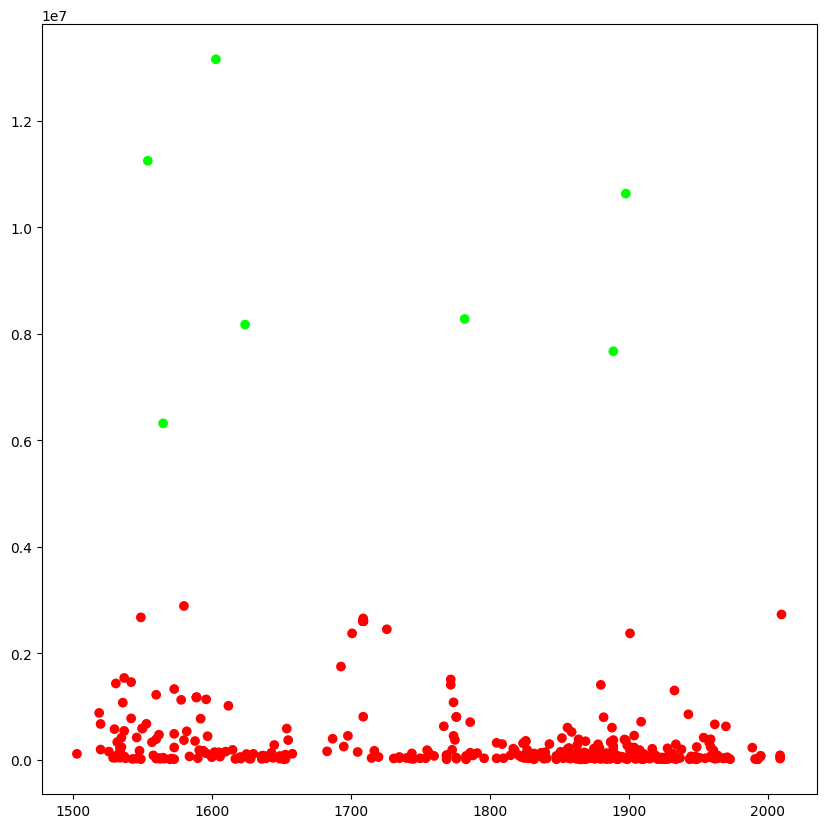

In [49]:
from pandas import json_normalize
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import json

with open("../../data/citypopulation.json", encoding="utf-8") as f:
    data = json.load(f)

dataframe = json_normalize(data)
le = LabelEncoder()
print(dataframe["cityLabel"])
dataframe["cityLabel"] = le.fit_transform(dataframe["cityLabel"])
print(dataframe["cityLabel"])
dataframe = dataframe.astype(
    dtype={"year": "<i4", "cityLabel": "<U200", "population": "i"}
)
dataframe = dataframe.loc[dataframe["year"] > 1500]
# dataframe = dataframe.loc[dataframe['population'] < 700000]
yearPopulation = dataframe[["year", "population"]]
clusters = KMeans(n_clusters=2, n_init=1000)
clusters.fit(yearPopulation.values)
colors = np.array(["#ff0000", "#00ff00", "#0000ff", "#ffff00"])

plot.rcParams["figure.figsize"] = [10, 10]
plot.scatter(
    yearPopulation["year"], yearPopulation["population"], c=colors[clusters.labels_]
)
plot.show()

Maintenant, continuons à travailler avec [flower.jpg](../../images/flower.jpg). Recommençons avec **KMeans** et essayons d'obtenir des groupes de taille comprise entre 2 et 11.

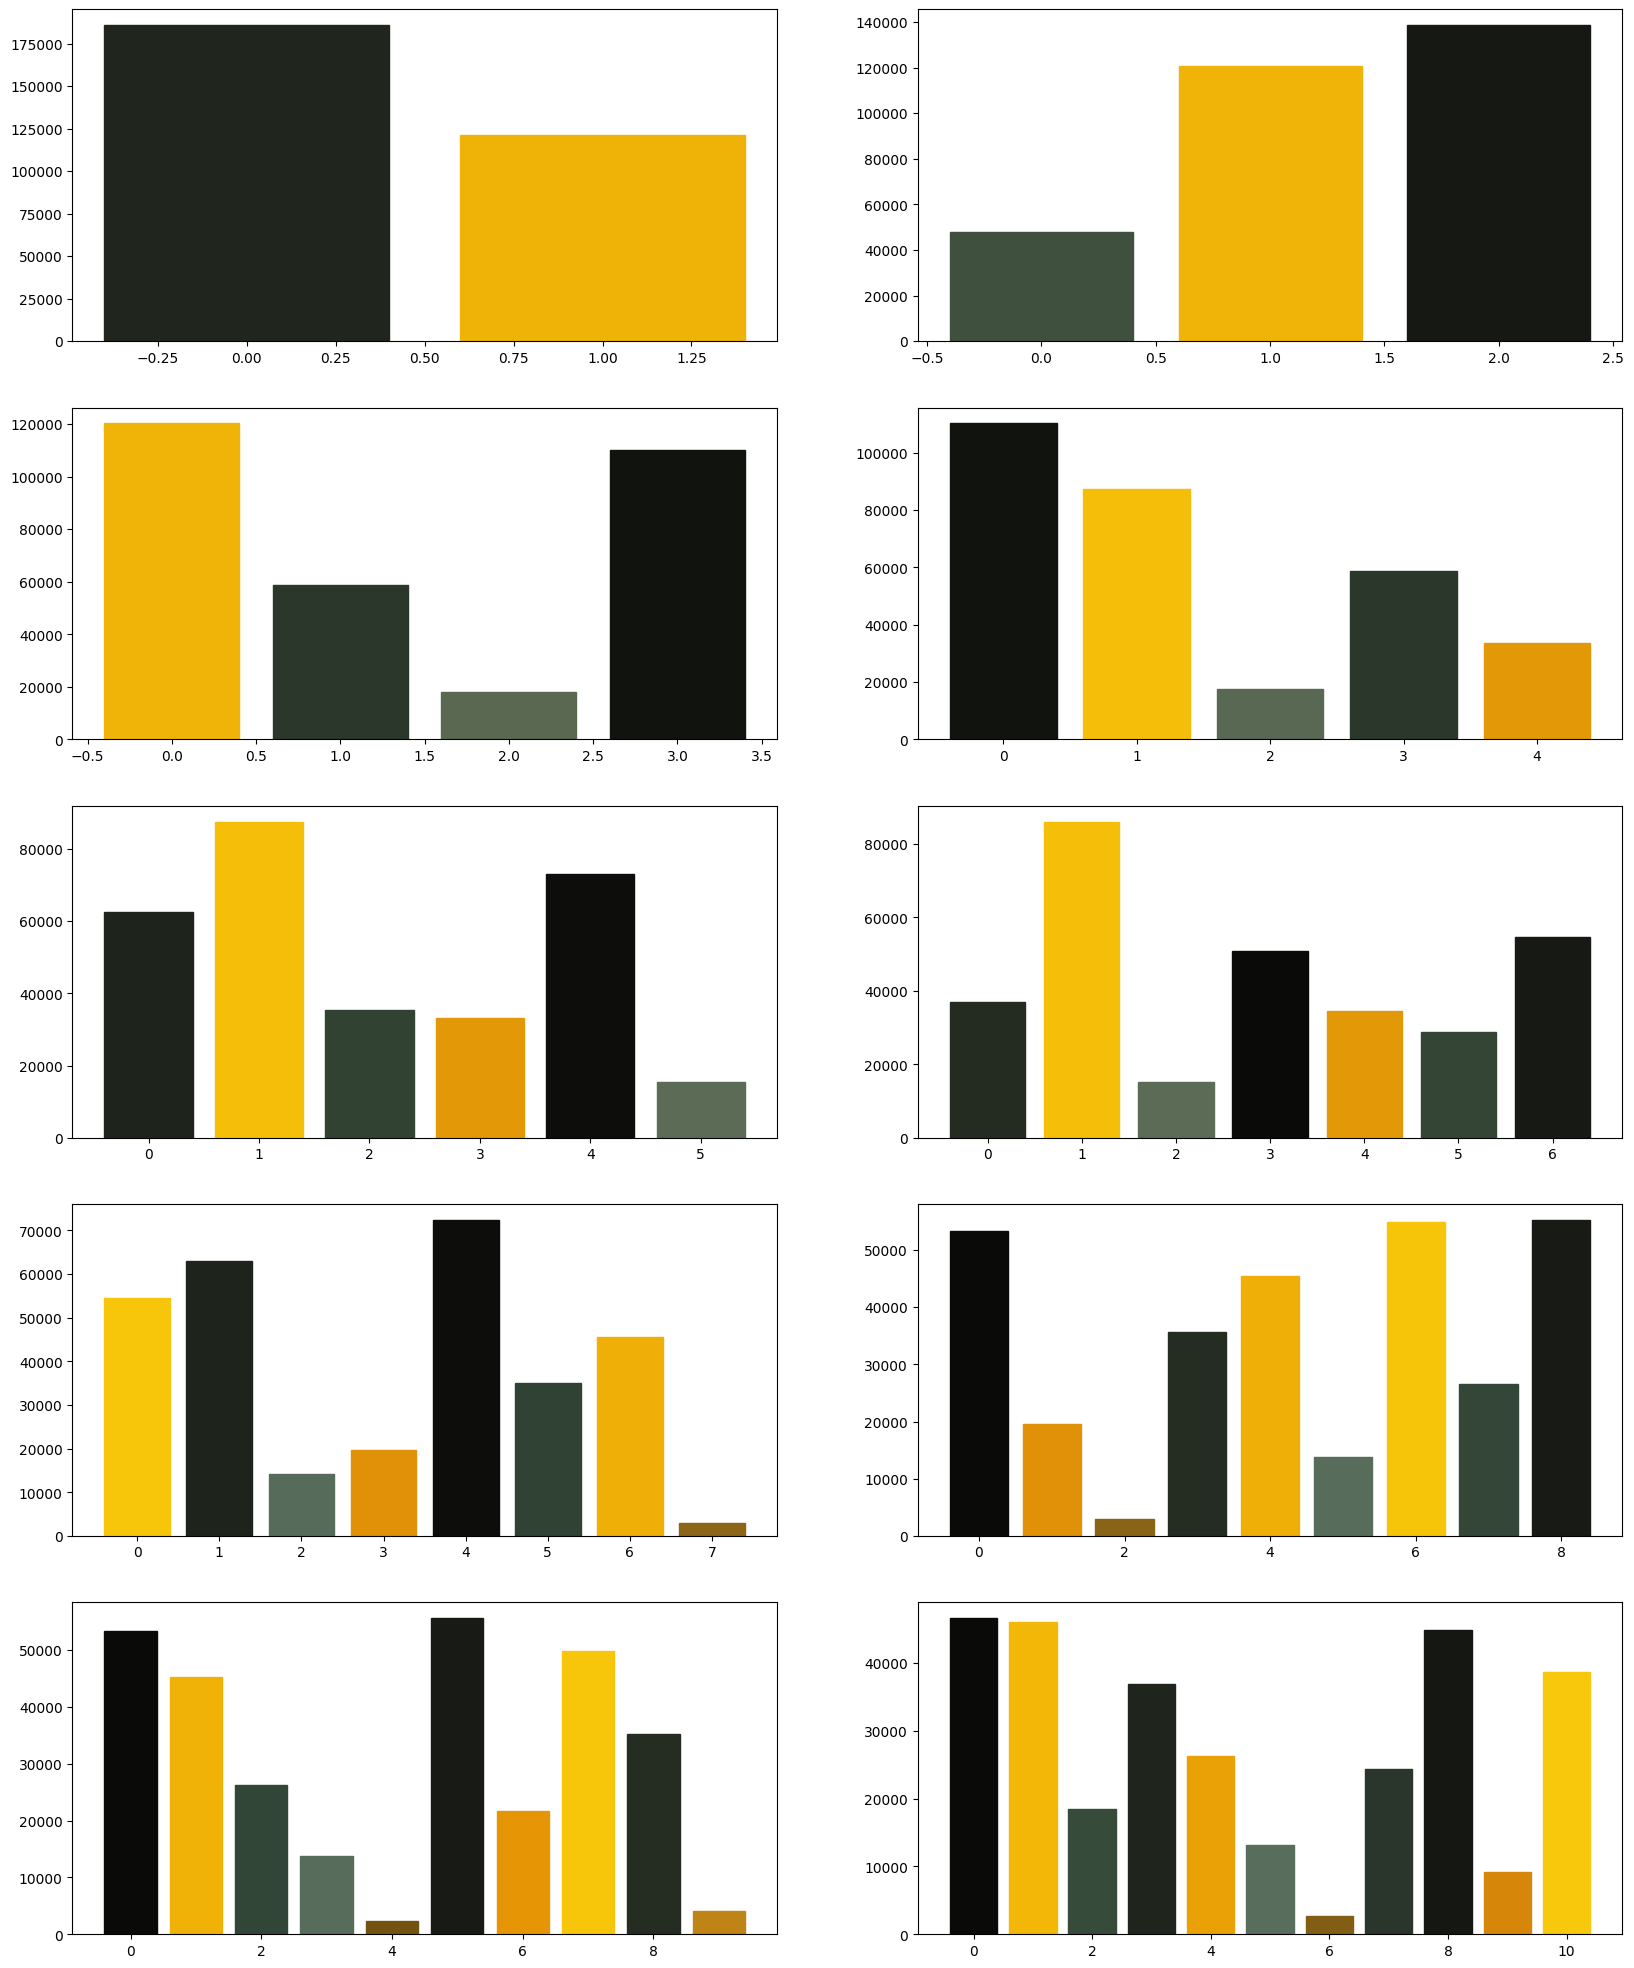

In [42]:
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

imgfile = Image.open("../../images/flower.jpg")
numarray = numpy.array(imgfile.get_flattened_data(), numpy.uint8)
X = []
Y = []
fig, axes = plot.subplots(nrows=5, ncols=2, figsize=(20, 25))
xaxis = 0
yaxis = 0
for x in range(2, 12):
    cluster_count = x

    clusters = KMeans(n_clusters=cluster_count, n_init=2)
    clusters.fit(numarray)

    npbins = numpy.arange(0, cluster_count + 1)
    histogram = numpy.histogram(clusters.labels_, bins=npbins)
    labels = numpy.unique(clusters.labels_)
    barlist = axes[xaxis, yaxis].bar(labels, histogram[0])
    if yaxis == 0:
        yaxis = 1
    else:
        xaxis = xaxis + 1
        yaxis = 0
    for i in range(cluster_count):
        barlist[i].set_color(
            "#%02x%02x%02x"
            % (
                math.ceil(clusters.cluster_centers_[i][0]),
                math.ceil(clusters.cluster_centers_[i][1]),
                math.ceil(clusters.cluster_centers_[i][2]),
            )
        )
plot.show()

Votre prochain objectif est de tester le code ci-dessus pour les tailles de grappes entre 2 et 21, ce qui vous donnera le chiffre indiqué ci-dessous.

**Note:** L'image suivante a été générée après 6 minutes. 

En option, vous pouvez ajouter des déclarations *print* pour tester si votre code fonctionne bien.

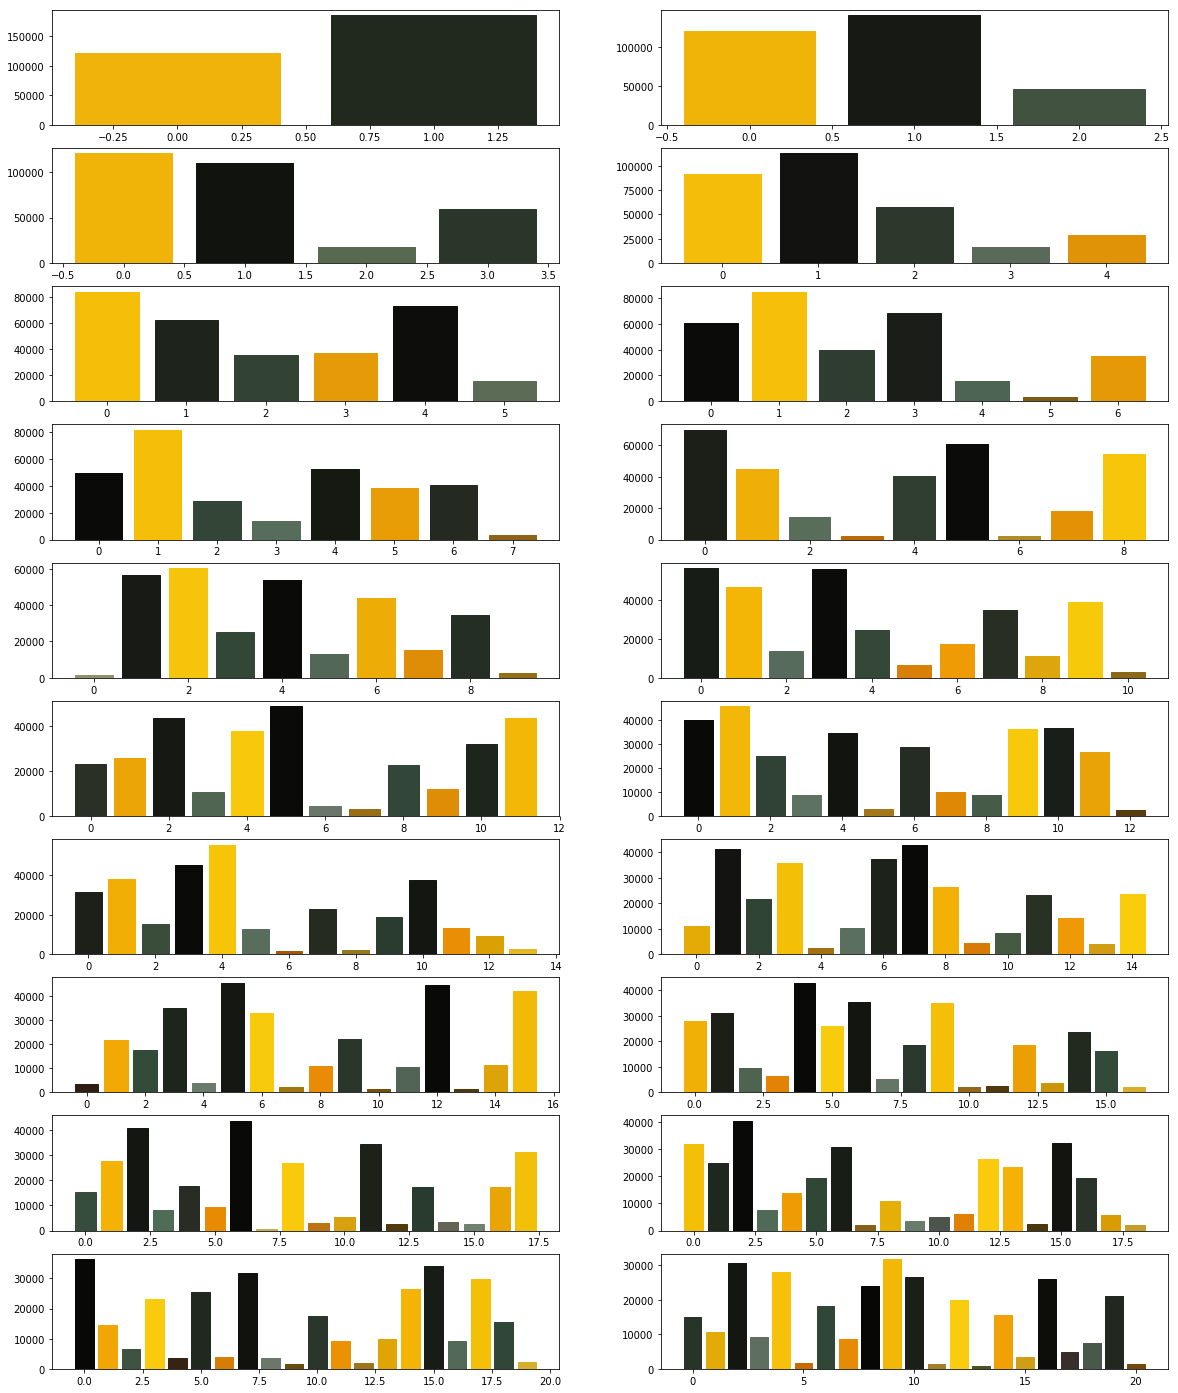

Maintenant, nous modifions l'algorithme ci-dessus pour utiliser l'algorithme de clustering **MiniBatchKMeans**.
(voir [ici](http://scikit-learn.org/stable/modules/clustering.html#mini-batch-kmeans)).
Observez les changements.



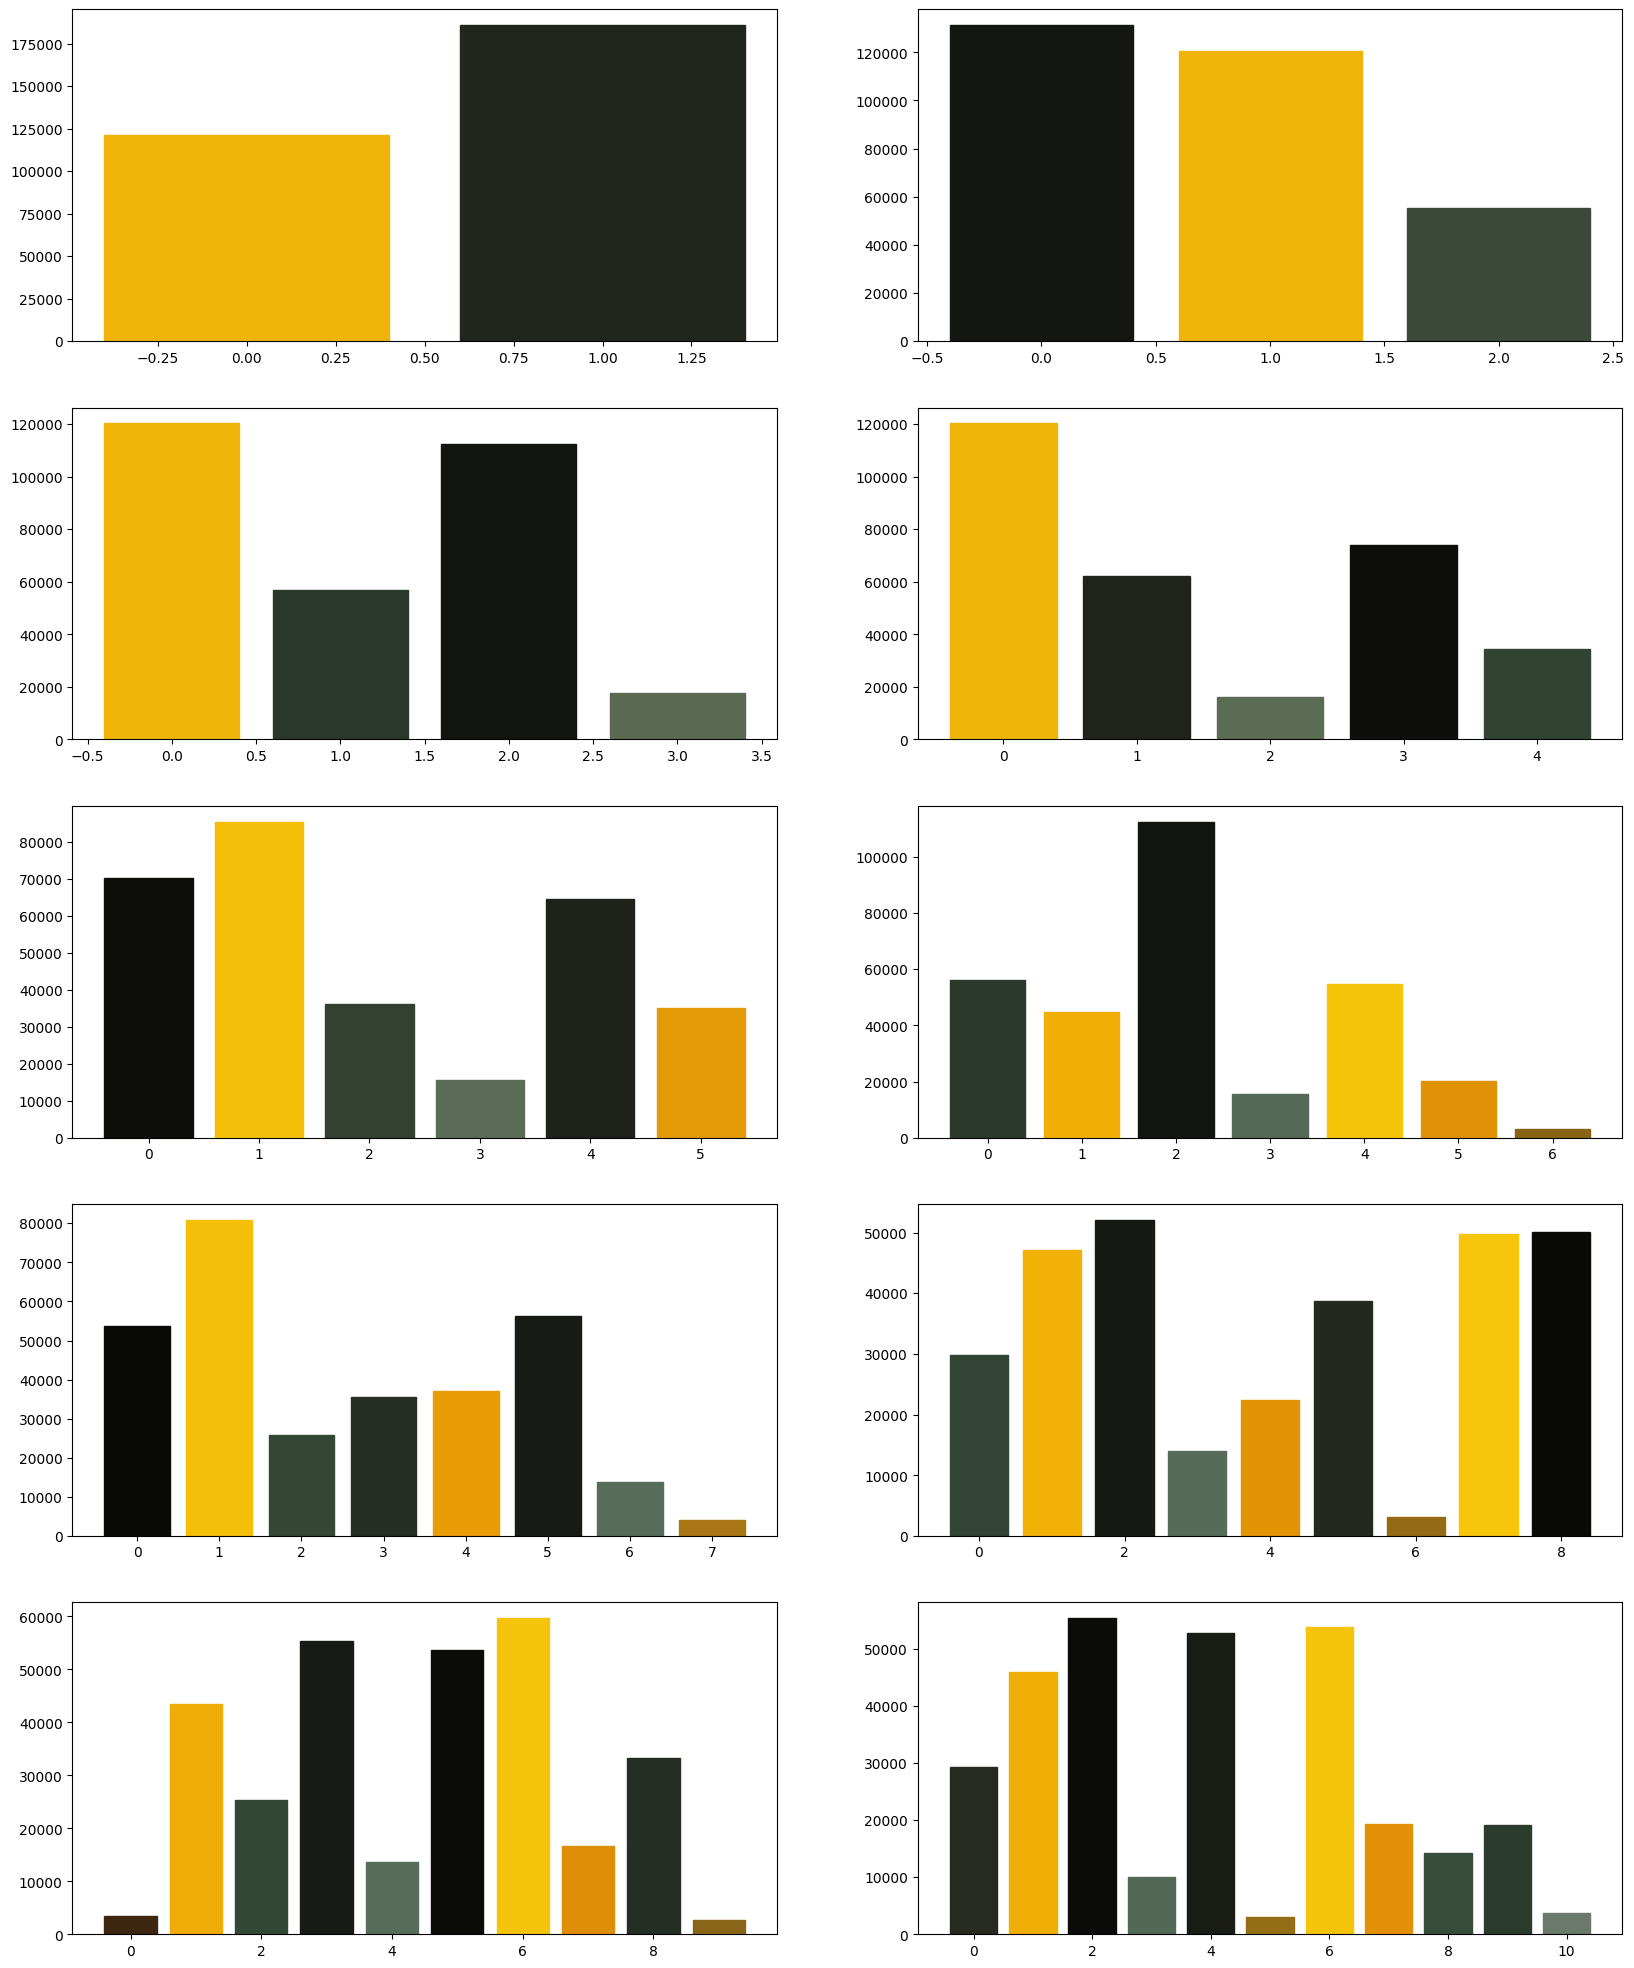

In [43]:
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import MiniBatchKMeans

imgfile = Image.open("../../images/flower.jpg")
numarray = numpy.array(imgfile.get_flattened_data(), numpy.uint8)
X = []
Y = []
fig, axes = plot.subplots(nrows=5, ncols=2, figsize=(20, 25))
xaxis = 0
yaxis = 0
for x in range(2, 12):
    cluster_count = x

    clusters = MiniBatchKMeans(n_clusters=cluster_count, n_init=2)
    clusters.fit(numarray)

    npbins = numpy.arange(0, cluster_count + 1)
    histogram = numpy.histogram(clusters.labels_, bins=npbins)
    labels = numpy.unique(clusters.labels_)
    barlist = axes[xaxis, yaxis].bar(labels, histogram[0])
    if yaxis == 0:
        yaxis = 1
    else:
        xaxis = xaxis + 1
        yaxis = 0
    for i in range(cluster_count):
        barlist[i].set_color(
            "#%02x%02x%02x"
            % (
                math.ceil(clusters.cluster_centers_[i][0]),
                math.ceil(clusters.cluster_centers_[i][1]),
                math.ceil(clusters.cluster_centers_[i][2]),
            )
        )
plot.show()

Qu'avez-vous observé ? Votre prochain objectif est de tester le code ci-dessus pour des tailles de grappes comprises entre 2 et 21, ce qui vous donnera la figure ci-dessous.

Quelles sont vos conclusions ?

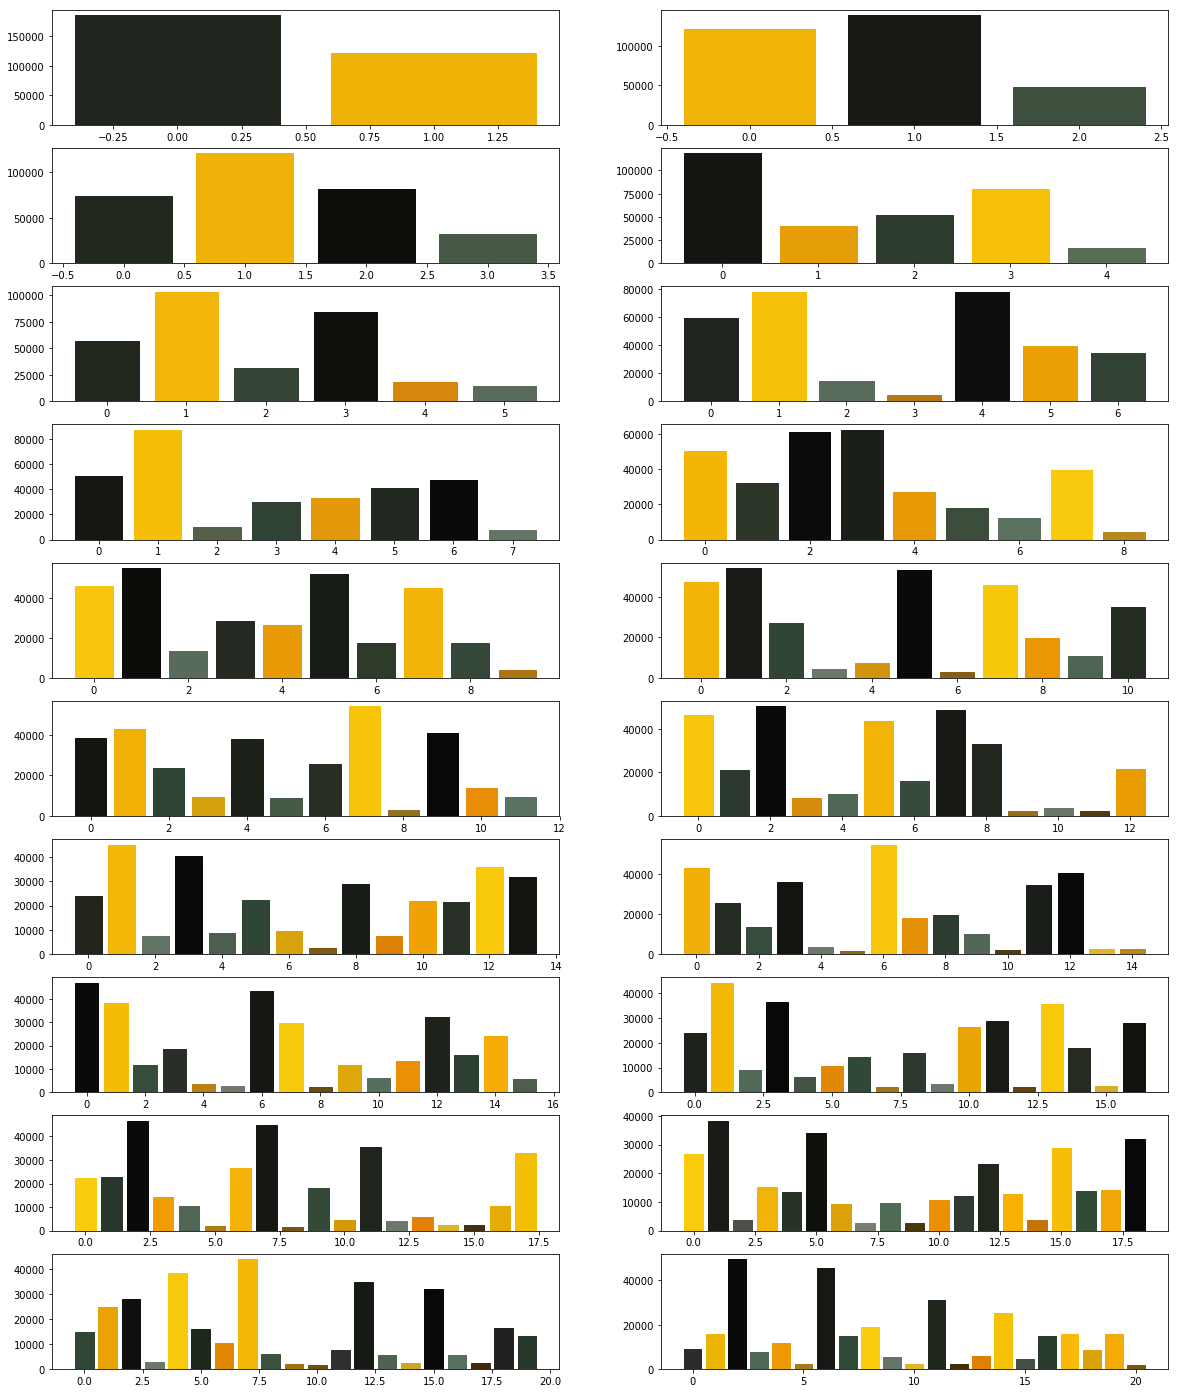

Afin de comparer les deux algorithmes, nous considérons le temps pris par chacun de ces algorithmes. Nous allons répéter l'expérience ci-dessus, mais cette fois nous allons tracer le temps nécessaire pour obtenir des grappes de tailles différentes.

Nous commençons par **KMeans**.


Total time:  1 : 0.06750893592834473
Total time:  2 : 0.0987401008605957
Total time:  3 : 0.1501786708831787
Total time:  4 : 0.11609911918640137
Total time:  5 : 0.15859603881835938
Total time:  6 : 0.27384400367736816
Total time:  7 : 0.19177889823913574
Total time:  8 : 0.2738776206970215
Total time:  9 : 0.36562514305114746
Total time:  10 : 0.33935999870300293
Total time:  11 : 0.31568217277526855
Total time:  12 : 0.41877007484436035
Total time:  13 : 0.46143317222595215
Total time:  14 : 0.42815113067626953
Total time:  15 : 0.396787166595459
Total time:  16 : 0.47211503982543945
Total time:  17 : 0.7071621417999268
Total time:  18 : 0.751554012298584
Total time:  19 : 1.0177631378173828


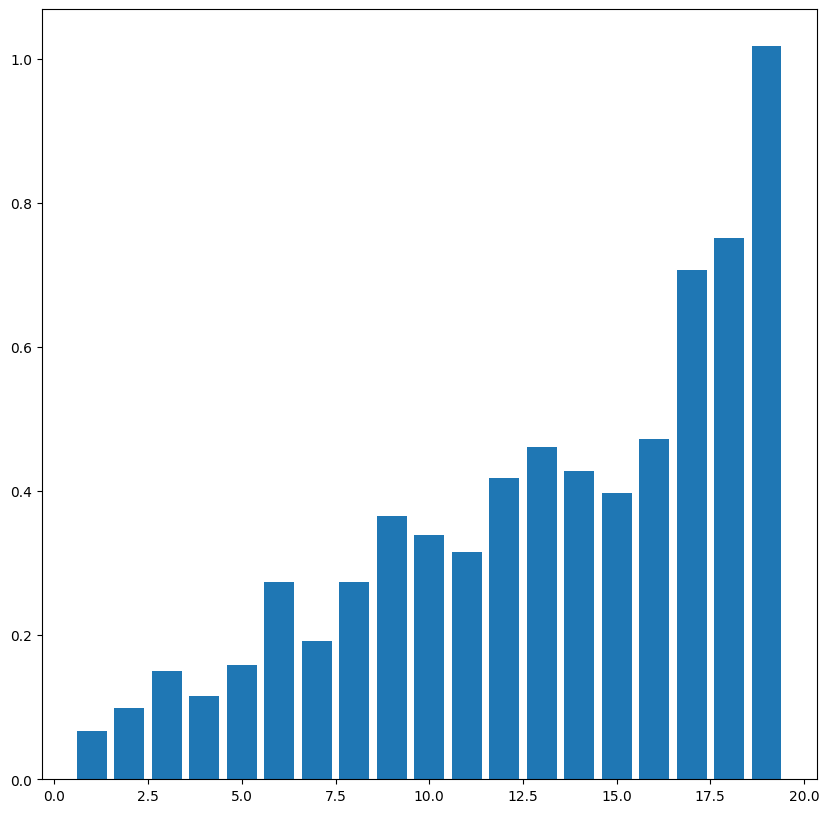

In [44]:
from PIL import Image
import numpy
import math
import time
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans

imgfile = Image.open("../../images/flower.jpg")
numarray = numpy.array(imgfile.get_flattened_data(), numpy.uint8)
X = []
Y = []
for x in range(1, 20):
    cluster_count = x

    start_time = time.time()
    clusters = KMeans(n_clusters=cluster_count, n_init=2)
    clusters.fit(numarray)
    end_time = time.time()
    total_time = end_time - start_time
    print("Total time: ", x, ":", total_time)
    X.append(x)
    Y.append(total_time)
plot.bar(X, Y)
plot.show()

Vous pouvez obtenir un graphique similaire à celui qui suit.

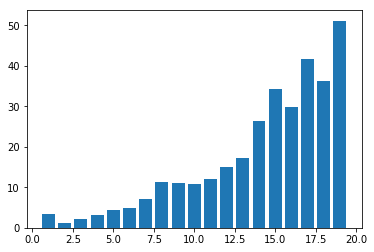

Nous utilisons maintenant **MiniBatchKMeans**.

Total time:  1 : 0.08794641494750977
Total time:  2 : 0.07714200019836426
Total time:  3 : 0.01299905776977539
Total time:  4 : 0.04332900047302246
Total time:  5 : 0.015688180923461914
Total time:  6 : 0.13541722297668457
Total time:  7 : 0.0343470573425293
Total time:  8 : 0.02303910255432129
Total time:  9 : 0.1197350025177002
Total time:  10 : 0.10681605339050293
Total time:  11 : 0.01734471321105957
Total time:  12 : 0.02152395248413086
Total time:  13 : 0.07636237144470215
Total time:  14 : 0.08220887184143066
Total time:  15 : 0.020382404327392578
Total time:  16 : 0.06660127639770508
Total time:  17 : 0.06806683540344238
Total time:  18 : 0.019930124282836914
Total time:  19 : 0.02341294288635254


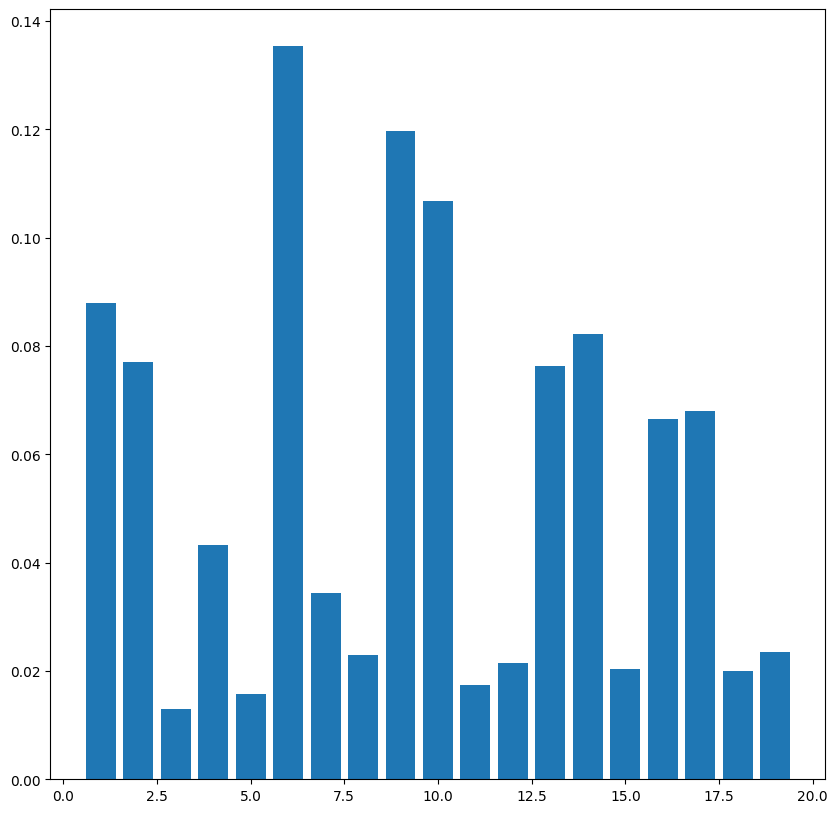

In [ ]:
from PIL import Image
import numpy
import math
import time
import matplotlib.pyplot as plot
from sklearn.cluster import MiniBatchKMeans

imgfile = Image.open("../../images/flower.jpg")
numarray = numpy.array(imgfile.get_flattened_data(), numpy.uint8)
X = []
Y = []
for x in range(1, 20):
    cluster_count = x

    start_time = time.time()
    clusters = MiniBatchKMeans(n_clusters=cluster_count, n_init=2)
    clusters.fit(numarray)
    end_time = time.time()
    total_time = end_time - start_time
    print("Total time: ", x, ":", total_time)
    X.append(x)
    Y.append(total_time)
plot.bar(X, Y)
plot.show()

Vous pouvez obtenir un graphique similaire à celui qui suit.

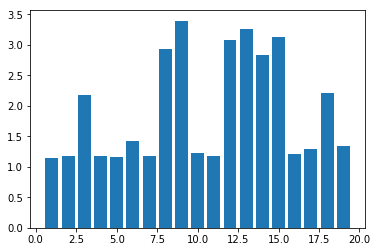

Testez maintenant le code ci-dessus en utilisant l'algorithme **MiniBatchKMeans** avec des tailles de grappes entre 2 et 50. Quelles sont vos observations ?

Enfin, nous voulons voir si nous obtenons les mêmes centres de grappes à partir des deux algorithmes. Lancez le programme suivant pour voir les centres de grappes produits par les deux algorithmes. Nous utilisons deux couleurs différentes (rouge et noir) pour distinguer les centres de grappes des deux algorithmes.


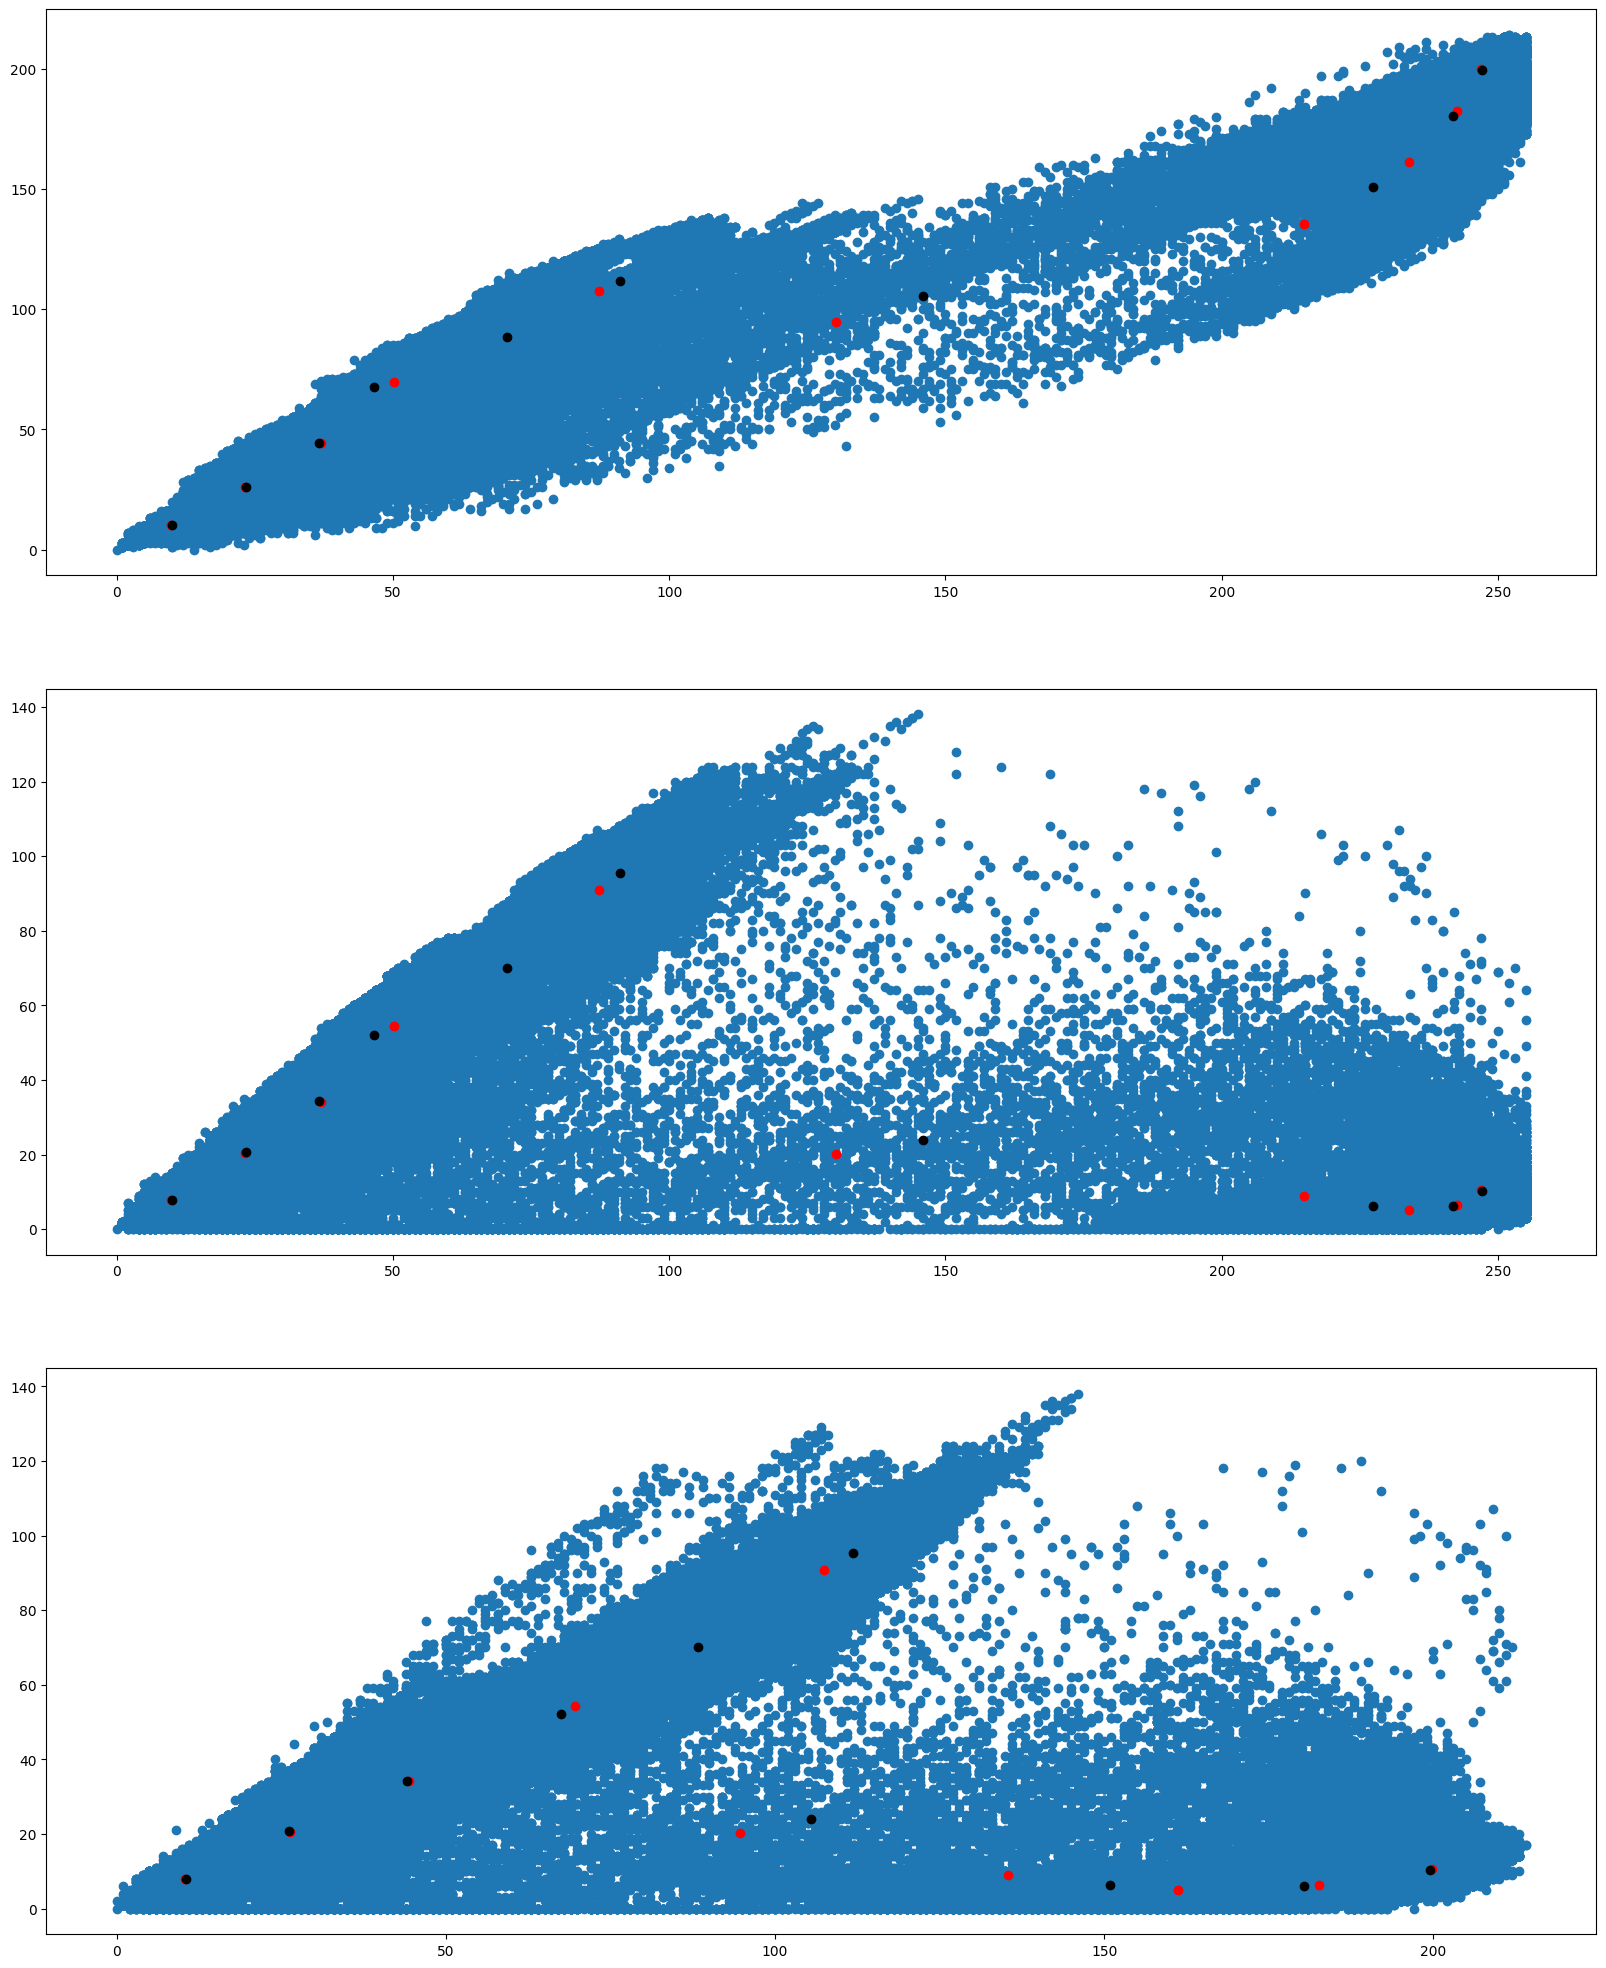

In [ ]:
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

imgfile = Image.open("../../images/flower.jpg")
numarray = numpy.array(imgfile.get_flattened_data(), numpy.uint8)

cluster_count = 10

clusters = KMeans(n_clusters=cluster_count, n_init=2)
clusters.fit(numarray)

mclusters = MiniBatchKMeans(n_clusters=cluster_count, n_init=2)
mclusters.fit(numarray)

fig, axes = plot.subplots(nrows=3, ncols=1, figsize=(20, 25))
# Scatter plot for RG (RGB)
axes[0].scatter(numarray[:, 0], numarray[:, 1])
axes[0].scatter(
    clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:, 1], c="red"
)
axes[0].scatter(
    mclusters.cluster_centers_[:, 0], mclusters.cluster_centers_[:, 1], c="black"
)

# Scatter plot of RB (RGB)
axes[1].scatter(numarray[:, 0], numarray[:, 2])
axes[1].scatter(
    clusters.cluster_centers_[:, 0], clusters.cluster_centers_[:, 2], c="red"
)
axes[1].scatter(
    mclusters.cluster_centers_[:, 0], mclusters.cluster_centers_[:, 2], c="black"
)

# Scatter plot of GB (RGB)
axes[2].scatter(numarray[:, 1], numarray[:, 2])
axes[2].scatter(
    clusters.cluster_centers_[:, 1], clusters.cluster_centers_[:, 2], c="red"
)
axes[2].scatter(
    mclusters.cluster_centers_[:, 1], mclusters.cluster_centers_[:, 2], c="black"
)

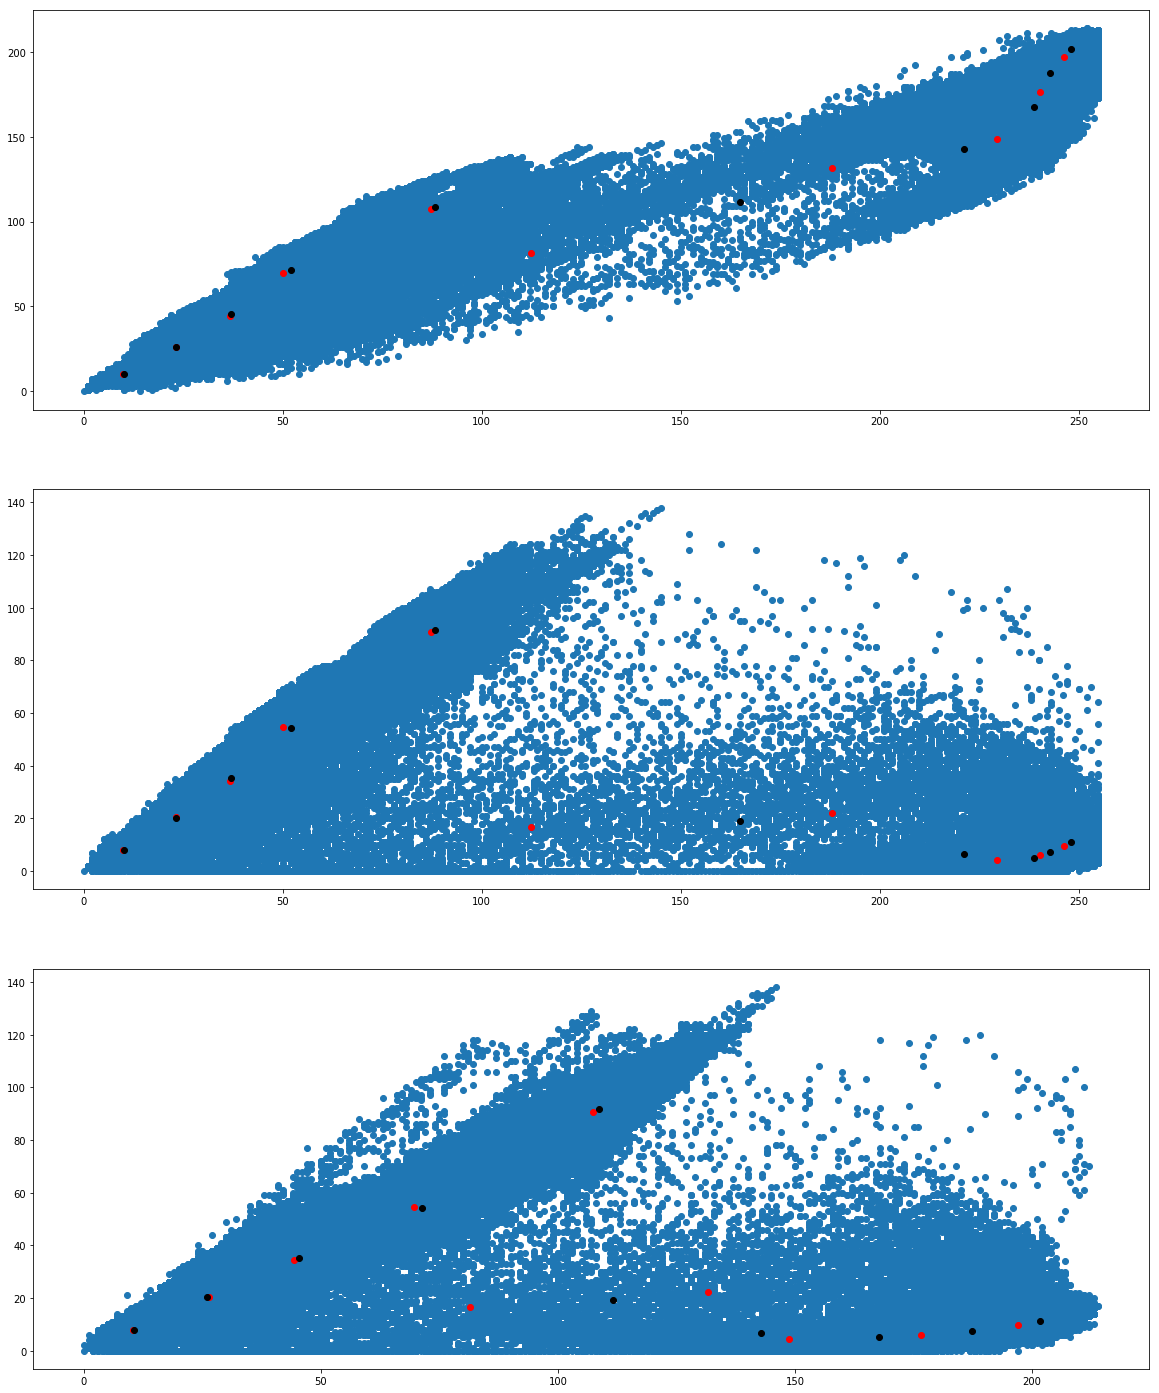

Nous aimerions voir comment les valeurs des pixels individuels ont été regroupées. Exécutez le programme suivant quelques fois.


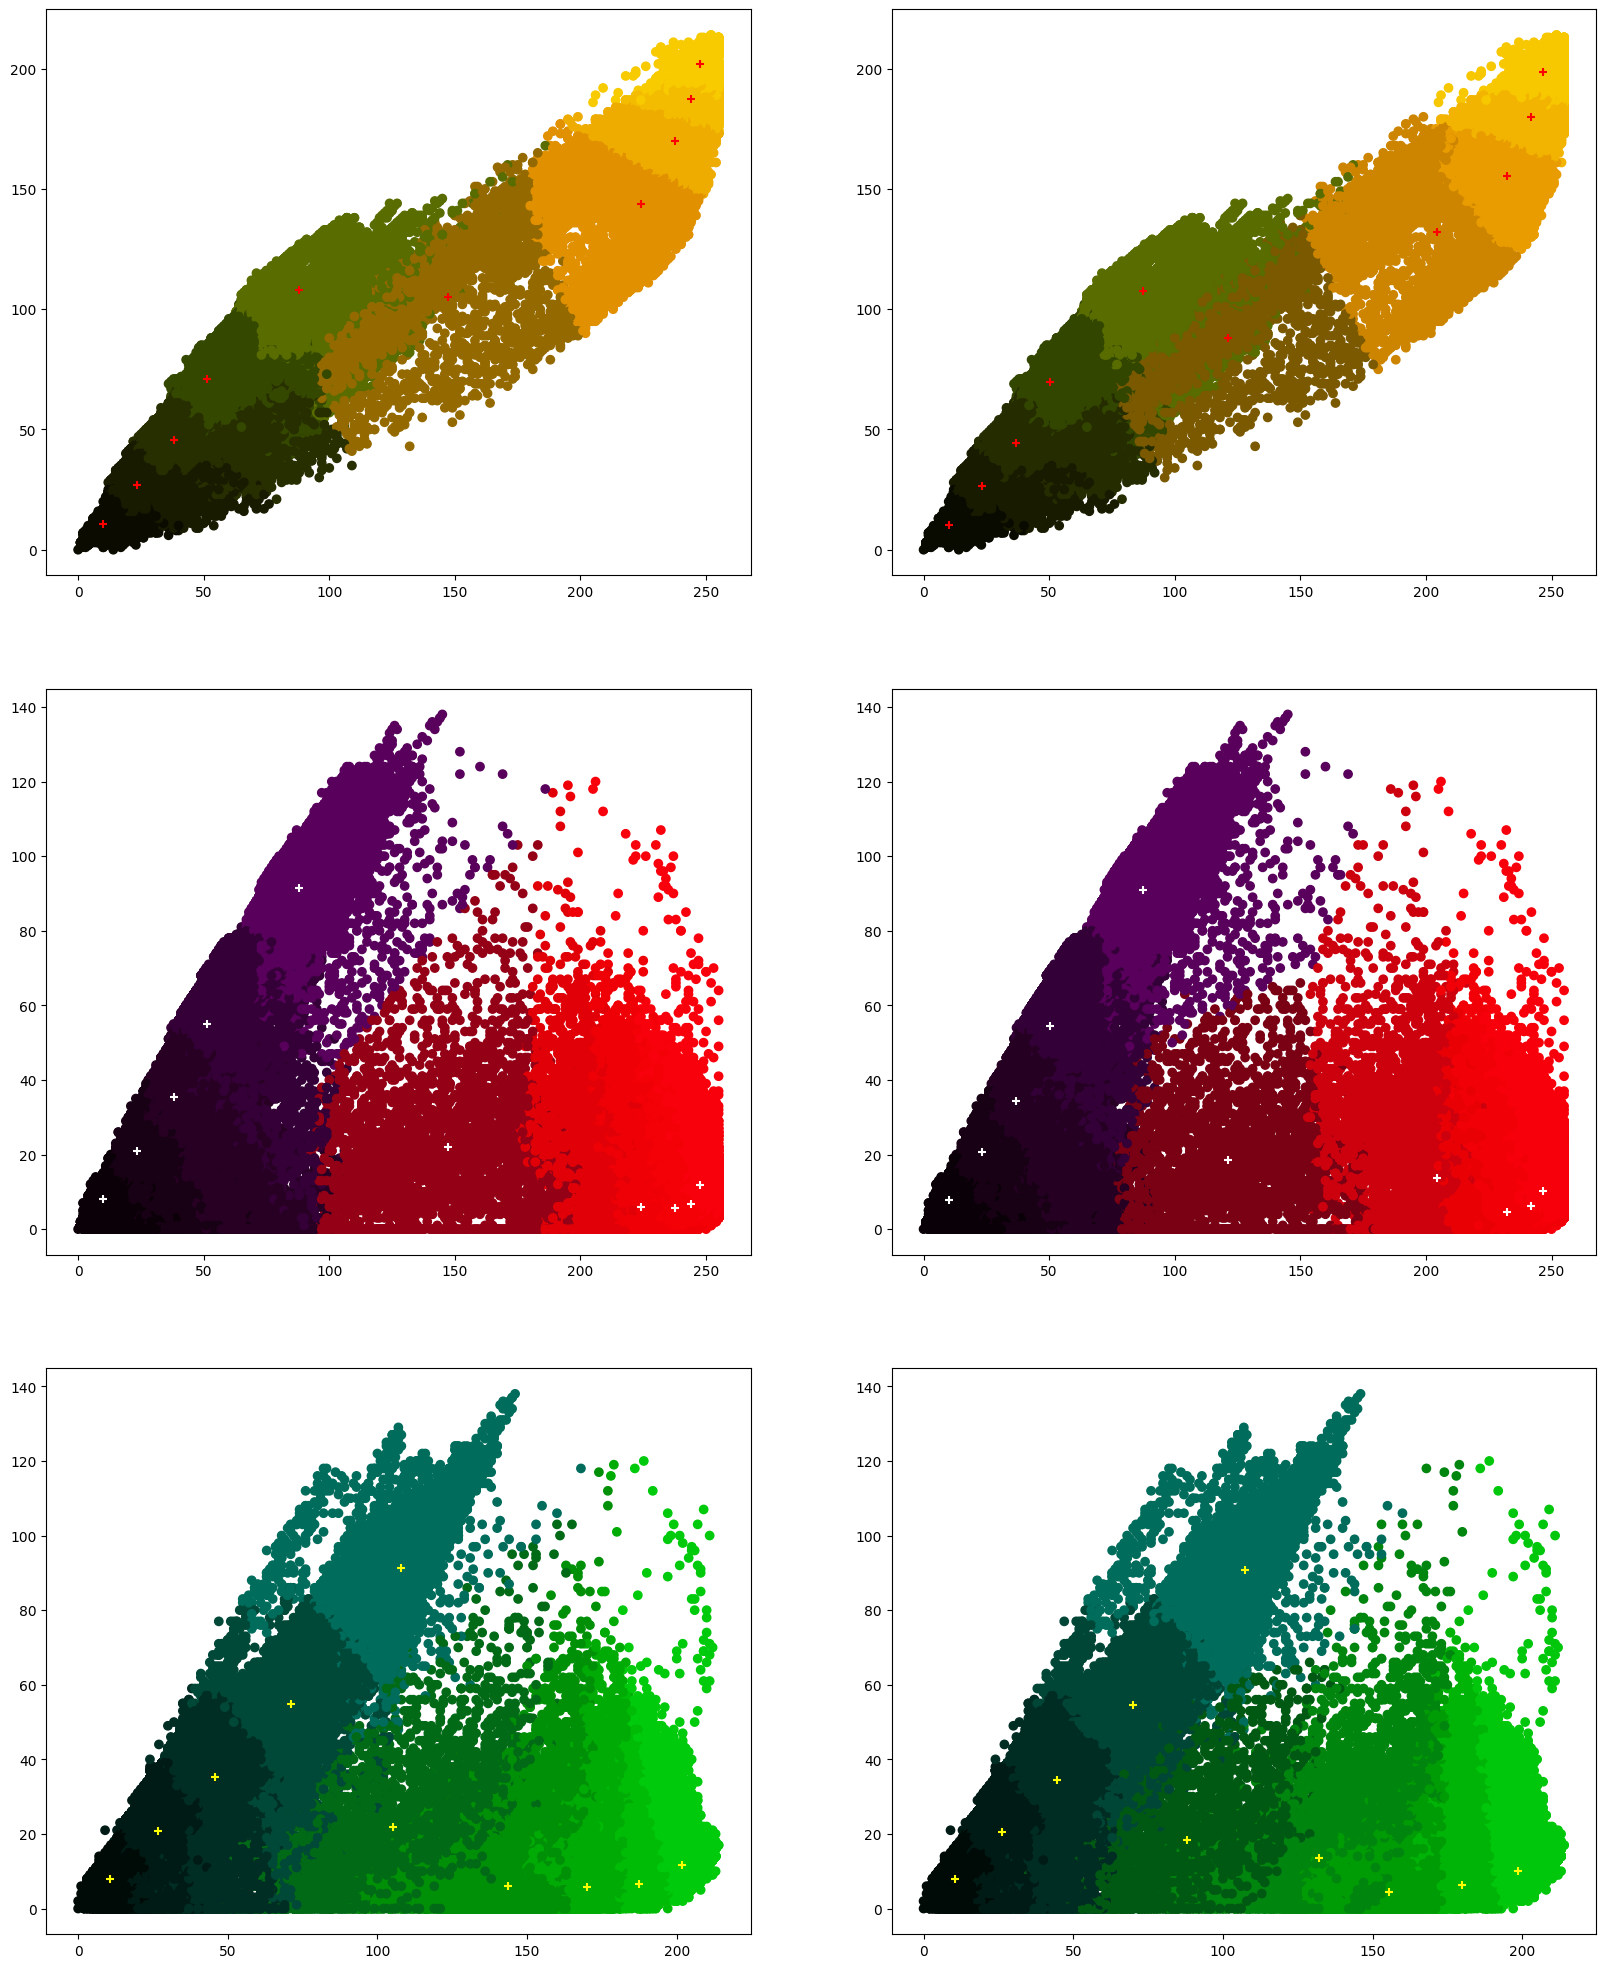

In [45]:
from PIL import Image
import numpy
import math
import time
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

imgfile = Image.open("../../images/flower.jpg")
numarray = numpy.array(imgfile.get_flattened_data(), numpy.uint8)

cluster_count = 10

mclusters = MiniBatchKMeans(n_clusters=cluster_count, n_init=2)
mclusters.fit(numarray)

npbins = numpy.arange(0, cluster_count + 1)
histogram = numpy.histogram(mclusters.labels_, bins=npbins)
labels = numpy.unique(mclusters.labels_)

fig, axes = plot.subplots(nrows=3, ncols=2, figsize=(20, 25))

# Scatter plot for RG (RGB)
colors = []
for i in range(len(numarray)):
    j = mclusters.labels_[i]
    colors.append(
        "#%02x%02x%02x"
        % (
            math.ceil(mclusters.cluster_centers_[j][0]),
            math.ceil(mclusters.cluster_centers_[j][1]),
            0,
        )
    )

axes[0, 0].scatter(numarray[:, 0], numarray[:, 1], c=colors)
axes[0, 0].scatter(
    mclusters.cluster_centers_[:, 0],
    mclusters.cluster_centers_[:, 1],
    marker="+",
    c="red",
)

# Scatter plot for RB (RGB)
colors = []
for i in range(len(numarray)):
    j = mclusters.labels_[i]
    colors.append(
        "#%02x%02x%02x"
        % (
            math.ceil(mclusters.cluster_centers_[j][0]),
            0,
            math.ceil(mclusters.cluster_centers_[j][2]),
        )
    )

axes[1, 0].scatter(numarray[:, 0], numarray[:, 2], c=colors)
axes[1, 0].scatter(
    mclusters.cluster_centers_[:, 0],
    mclusters.cluster_centers_[:, 2],
    marker="+",
    c="white",
)

# Scatter plot for GB (RGB)
colors = []
for i in range(len(numarray)):
    j = mclusters.labels_[i]
    colors.append(
        "#%02x%02x%02x"
        % (
            0,
            math.ceil(mclusters.cluster_centers_[j][1]),
            math.ceil(mclusters.cluster_centers_[j][2]),
        )
    )

axes[2, 0].scatter(numarray[:, 1], numarray[:, 2], c=colors)
axes[2, 0].scatter(
    mclusters.cluster_centers_[:, 1],
    mclusters.cluster_centers_[:, 2],
    marker="+",
    c="yellow",
)

clusters = KMeans(n_clusters=cluster_count, n_init=2)
clusters.fit(numarray)

npbins = numpy.arange(0, cluster_count + 1)
histogram = numpy.histogram(clusters.labels_, bins=npbins)
labels = numpy.unique(clusters.labels_)

# Scatter plot for RG (RGB)
colors = []
for i in range(len(numarray)):
    j = clusters.labels_[i]
    colors.append(
        "#%02x%02x%02x"
        % (
            math.ceil(clusters.cluster_centers_[j][0]),
            math.ceil(clusters.cluster_centers_[j][1]),
            0,
        )
    )

axes[0, 1].scatter(numarray[:, 0], numarray[:, 1], c=colors)
axes[0, 1].scatter(
    clusters.cluster_centers_[:, 0],
    clusters.cluster_centers_[:, 1],
    marker="+",
    c="red",
)

# Scatter plot for RB (RGB)
colors = []
for i in range(len(numarray)):
    j = clusters.labels_[i]
    colors.append(
        "#%02x%02x%02x"
        % (
            math.ceil(clusters.cluster_centers_[j][0]),
            0,
            math.ceil(clusters.cluster_centers_[j][2]),
        )
    )

axes[1, 1].scatter(numarray[:, 0], numarray[:, 2], c=colors)
axes[1, 1].scatter(
    clusters.cluster_centers_[:, 0],
    clusters.cluster_centers_[:, 2],
    marker="+",
    c="white",
)

# Scatter plot for GB (RGB)
colors = []
for i in range(len(numarray)):
    j = clusters.labels_[i]
    colors.append(
        "#%02x%02x%02x"
        % (
            0,
            math.ceil(clusters.cluster_centers_[j][1]),
            math.ceil(clusters.cluster_centers_[j][2]),
        )
    )

axes[2, 1].scatter(numarray[:, 1], numarray[:, 2], c=colors)
axes[2, 1].scatter(
    clusters.cluster_centers_[:, 1],
    clusters.cluster_centers_[:, 2],
    marker="+",
    c="yellow",
)
plot.show()

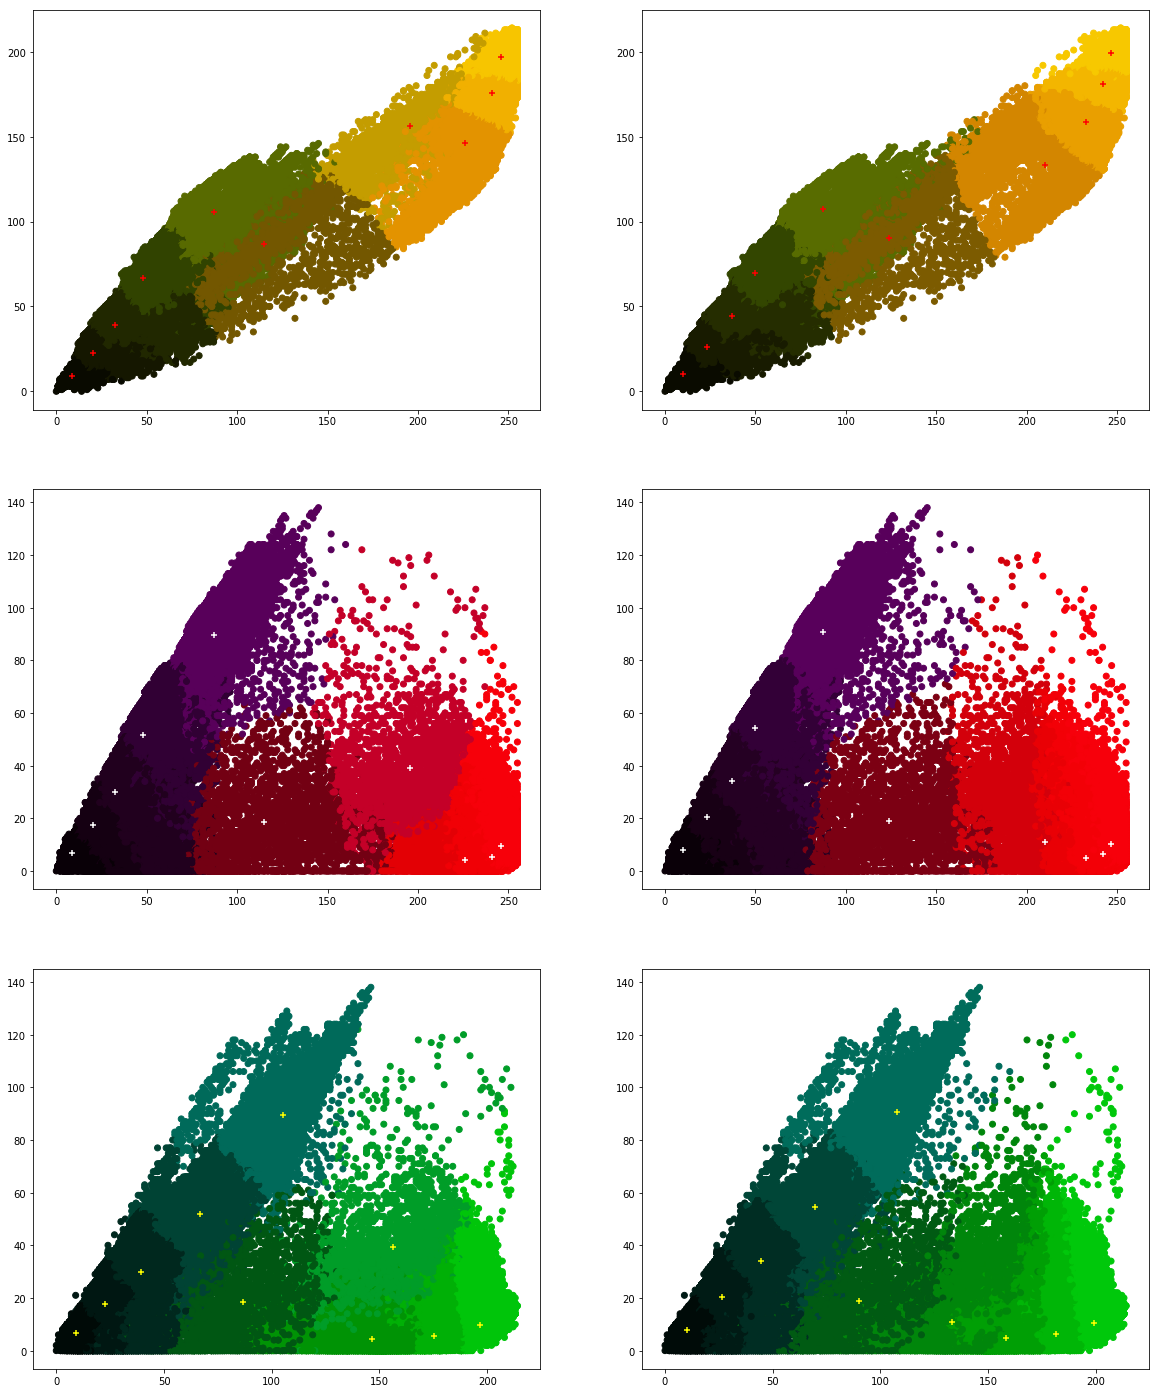

Quelles sont vos conclusions ?



**Question 1**

Dans cette question, vous devez regrouper un ensemble d'images en utilisant KMeans et MiniBatchKMeans et évaluer leur évolutivité.

a. **Regroupement d'images** :
- Utilisez un ensemble de 5 images avec des contenus variés (par exemple, nature, paysages urbains, art abstrait).
- Appliquez MiniBatchKMeans avec différentes valeurs pour `n_clusters` (2, 4, 6, 8) afin d'identifier les couleurs dominantes dans chaque image.

b. **Profilage des performances** :
- Pour chaque image et chaque nombre de clusters, profilez le temps d'exécution et l'utilisation de la mémoire du processus de regroupement en utilisant `time` et `tracemalloc`.
- Créez un graphique à barres comparant le temps d'exécution et l'utilisation de la mémoire pour chaque image avec différents nombres de clusters.

In [ ]:
import tracemalloc
import numpy as np

def my_function():
    arr = np.random.rand(1000, 1000)
    return arr

tracemalloc.start()
my_function()
current, peak = tracemalloc.get_traced_memory()
tracemalloc.stop()

print(f"Current: {current / 1e6:.2f} MB")
print(f"Peak: {peak / 1e6:.2f} MB")

Current: 0.00 MB
Peak: 8.00 MB


Chargé : flower.jpg


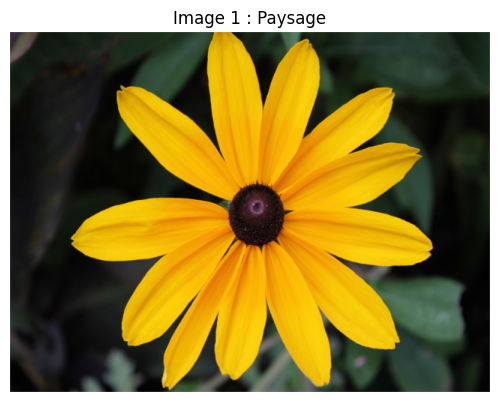

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# --- Configuration des fichiers ---
# Remplacez ces noms par vos propres images (ex: 'montagne.jpg', 'visage.png')
fichiers_images = ['flower.jpg']

images_selectionnees = []
titres = ["Image 1 : Paysage", "Image 2 : Portrait", "Image 3 : Abstrait"]

# --- Chargement des images ---
for i, fichier in enumerate(fichiers_images):
    try:
        # Essai de chargement de votre fichier
        img = plt.imread(fichier)
        # Normalisation (0-1) si nécessaire
        if img.dtype == np.uint8:
            img = img / 255.0
        # Suppression du canal Alpha (transparence) si présent
        if img.shape[2] == 4:
            img = img[:, :, :3]
        images_selectionnees.append(img)
        print(f"Chargé : {fichier}")
        
    except FileNotFoundError:
        # Si pas de fichier, on charge une image exemple de Scikit-Image ou aléatoire
        print(f"Fichier '{fichier}' non trouvé -> Utilisation d'une image exemple.")
        if i == 0:
            img = data.coffee() # Nature morte / Paysage
        elif i == 1:
            img = data.astronaut() # Portrait
        else:
            # Création d'une image abstraite (bruit aléatoire)
            img = np.random.rand(300, 300, 3) 
            
        # Normalisation
        if img.dtype == np.uint8:
            img = img / 255.0
        images_selectionnees.append(img)

# --- Affichage pour validation ---
plt.figure(figsize=(15, 5))

for i, (img, titre) in enumerate(zip(images_selectionnees, titres)):
    plt.subplot(1, 3, i + 1)
    plt.imshow(img)
    plt.title(titre)
    plt.axis('off')

plt.tight_layout()
plt.show()

## Exercice 5 [★★★]

Enfin, nous traçons ces clusters en 3D. Testez le graphique suivant avec différentes images et différents nombres de clusters.

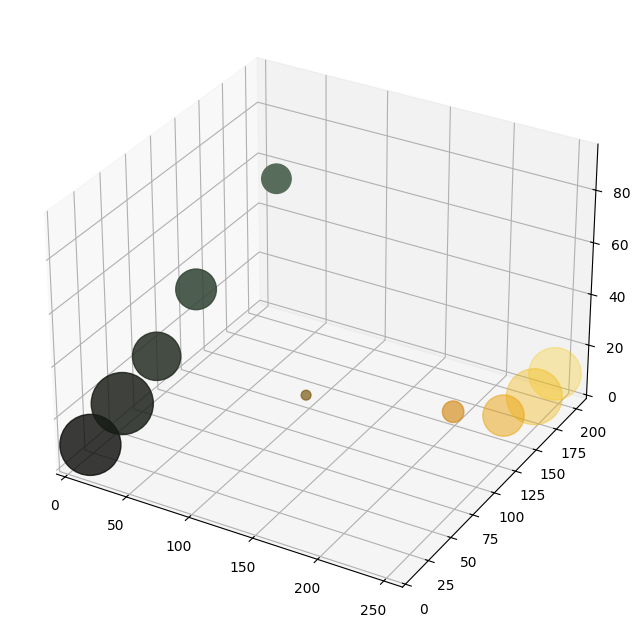

In [ ]:
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import scale, minmax_scale

cluster_count = 10

imgfile = Image.open("../../images/flower.jpg")
numarray = numpy.array(imgfile.get_flattened_data(), numpy.uint8)

# Calculer les clusters
clusters = KMeans(n_clusters=cluster_count, n_init=2)
clusters.fit(numarray)


# Calculer le nombre de pixels appartenant à chaque cluster
unique, frequency = numpy.unique(clusters.labels_, return_counts=True)

# Mise à l'échelle de la valeur de la fréquence entre 50 et 2000
# (ces valeurs ont été choisies au hasard)
scaled_frequency = minmax_scale(frequency, feature_range=(50, 2000))

colors = []
for i in range(len(clusters.cluster_centers_)):
    colors.append(
        "#%02x%02x%02x"
        % (
            math.ceil(clusters.cluster_centers_[i][0]),
            math.ceil(clusters.cluster_centers_[i][1]),
            math.ceil(clusters.cluster_centers_[i][2]),
        )
    )

# Diagramme de dispersion 3D
plot.figure(figsize=(8, 8))
axes = plot.axes(projection="3d")
axes.scatter3D(
    clusters.cluster_centers_[:, 0],
    clusters.cluster_centers_[:, 1],
    clusters.cluster_centers_[:, 2],
    c=colors,
    s=scaled_frequency,
);

Comparez les deux approches (MiniBatchKMeans et KMeans).

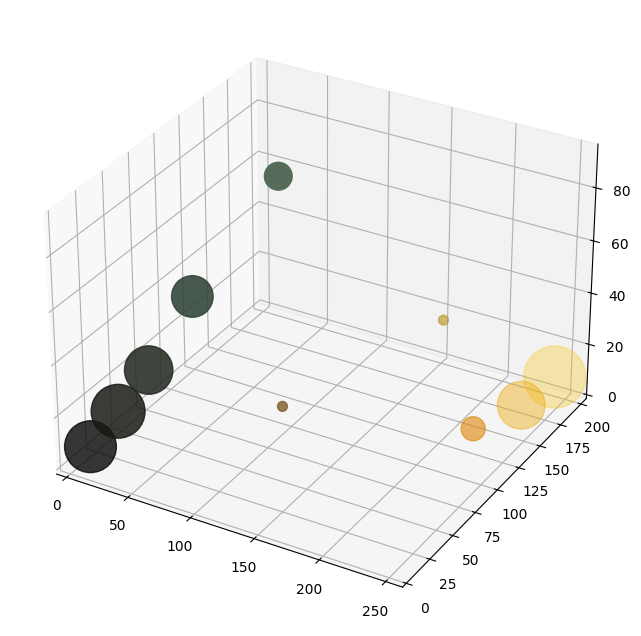

In [ ]:
from PIL import Image
import numpy
import math
import matplotlib.pyplot as plot
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.preprocessing import scale, minmax_scale

cluster_count = 10

imgfile = Image.open("../../images/flower.jpg")
numarray = numpy.array(imgfile.get_flattened_data(), numpy.uint8)

# Calculer les clusters
clusters = MiniBatchKMeans(n_clusters=cluster_count, n_init=2)
clusters.fit(numarray)


# Calculer le nombre de pixels appartenant à chaque cluster
unique, frequency = numpy.unique(clusters.labels_, return_counts=True)

# Mise à l'échelle de la valeur de la fréquence entre 50 et 2000
# (ces valeurs ont été choisies au hasard)
scaled_frequency = minmax_scale(frequency, feature_range=(50, 2000))

colors = []
for i in range(len(clusters.cluster_centers_)):
    colors.append(
        "#%02x%02x%02x"
        % (
            math.ceil(clusters.cluster_centers_[i][0]),
            math.ceil(clusters.cluster_centers_[i][1]),
            math.ceil(clusters.cluster_centers_[i][2]),
        )
    )

# Diagramme de dispersion 3D
plot.figure(figsize=(8, 8))
axes = plot.axes(projection="3d")
axes.scatter3D(
    clusters.cluster_centers_[:, 0],
    clusters.cluster_centers_[:, 1],
    clusters.cluster_centers_[:, 2],
    c=colors,
    s=scaled_frequency,
)

### Segmentation d'Image avec l'Algorithme de Clustering KMeans

Ensuite, nous allons effectuer une segmentation d'image en utilisant l'algorithme de clustering KMeans. L'objectif est de segmenter l'image en régions ayant des couleurs similaires, puis de reconstruire l'image en utilisant les couleurs segmentées.

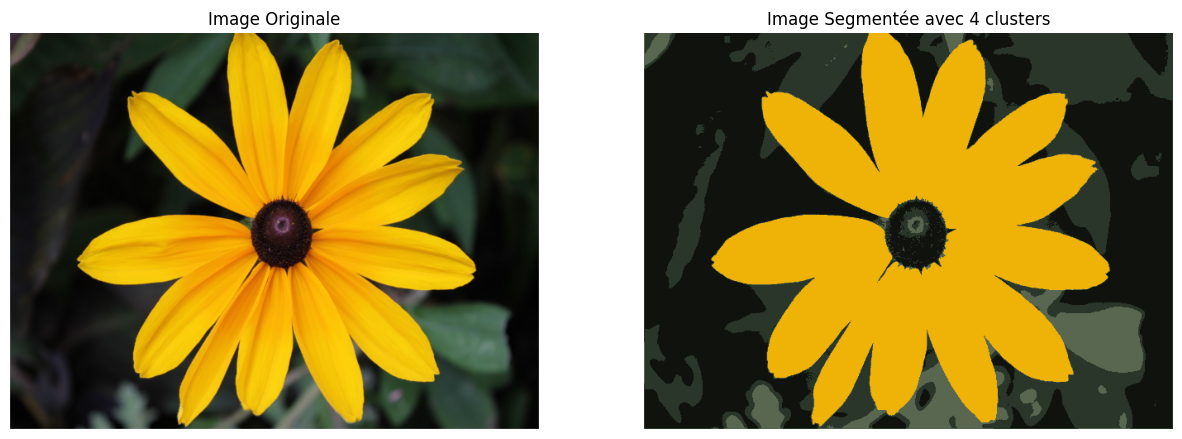

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Charger l'image
imgfile = Image.open("../../images/flower.jpg")
img = np.array(imgfile)

# Redimensionner l'image en un tableau 2D (chaque ligne est un pixel et chaque colonne est un canal de couleur)
pixels = img.reshape(-1, 3)

# Appliquer le clustering KMeans aux pixels de l'image
cluster_count = 4  # Expérimentez avec différentes valeurs (par exemple, 3, 6, 10)
kmeans = KMeans(n_clusters=cluster_count, n_init=10)
kmeans.fit(pixels)

# Obtenir les centres des clusters (valeurs RGB)
cluster_centers = kmeans.cluster_centers_

# Assigner chaque pixel au centre de cluster le plus proche
segmented_img = cluster_centers[kmeans.labels_].reshape(img.shape)

# Reconstruire l'image segmentée avec les centres des clusters
segmented_img = np.clip(segmented_img, 0, 255).astype(np.uint8)

# Convertir l'image segmentée en type entier non signé sur 8 bits pour l'affichage
# Afficher l'image originale et l'image segmentée
fig, axes = plt.subplots(1, 2, figsize=(15, 7))
axes[0].imshow(img)
axes[0].set_title("Image Originale")
axes[0].axis('off')

axes[1].imshow(segmented_img)
axes[1].set_title(f"Image Segmentée avec {cluster_count} clusters")
axes[1].axis('off')

plt.show()


### La méthode du coude pour déterminer le nombre optimal de clusters

**Inertie** : Dans le clustering KMeans, l'inertie (également connue sous le nom de somme des erreurs au carré, SSE) est calculée comme la somme des distances au carré entre chaque point et son centre de cluster (centroïde). L'idée est qu'en minimisant cette inertie, le modèle de clustering trouve des clusters compacts où les points sont plus proches de leurs centroïdes respectifs.

**Méthode du coude** :
   - Lorsque vous tracez l'inertie en fonction du nombre de clusters (`k`), vous constatez généralement que l'inertie diminue à mesure que `k` augmente.
   - Initialement, ajouter plus de clusters réduit considérablement l'inertie, car chaque point est affecté à un cluster plus spécifique.
   - Après un certain point, ajouter plus de clusters entraîne une réduction beaucoup plus lente de l'inertie, et c'est là que le "coude" apparaît.
   - Le "coude" représente le nombre optimal de clusters, car ajouter plus de clusters au-delà de ce point n'entraîne pas d'améliorations substantielles de la qualité du modèle (mesurée par l'inertie).

**Interprétation du graphique** :
   - Sur l'**axe des x**, vous avez le nombre de clusters (`k`).
   - Sur l'**axe des y**, vous tracez l'inertie pour chaque valeur de `k`.

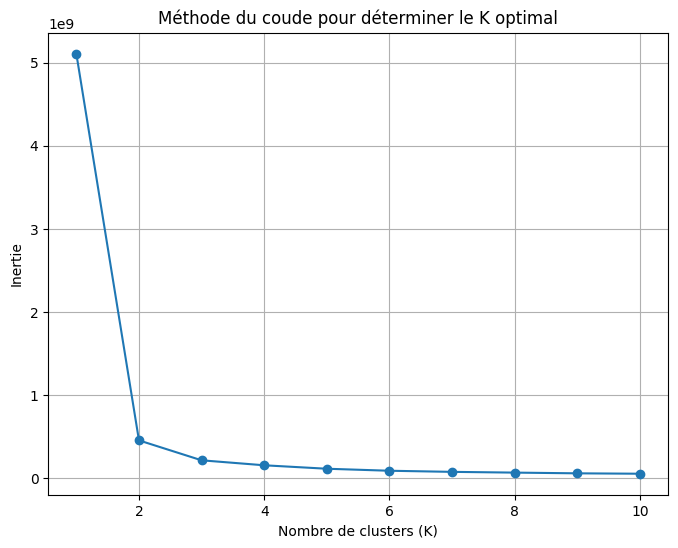

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Charger l'image
imgfile = Image.open("../../images/flower.jpg")
img = np.array(imgfile)

# Redimensionner l'image en un tableau 2D (chaque ligne est un pixel et chaque colonne est un canal de couleur)
pixels = img.reshape(-1, 3)

# Liste pour stocker l'inertie pour différents nombres de clusters
inertia_values = []

# Essayer différentes tailles de clusters de 1 à 10
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(pixels)
    inertia_values.append(kmeans.inertia_)

# Tracer les valeurs d'inertie en fonction du nombre de clusters
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia_values, marker='o')
plt.title('Méthode du coude pour déterminer le K optimal')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Inertie')
plt.grid(True)
plt.show()

Quelle est la valeur optimale du nombre de clusters ?

La **méthode de la silhouette** évalue la qualité du clustering en mesurant dans quelle mesure chaque point de données s'adapte bien à son cluster assigné par rapport aux autres clusters. Elle calcule un **score de silhouette** pour chaque point, défini par :

$s(i) = \frac{b(i) - a(i)}{\max(a(i), b(i))}$

où :  
- $a(i)$ est la distance moyenne entre un point et les autres dans son cluster.  
- $b(i)$ est la distance moyenne entre le point et le cluster le plus proche.

Le score varie de **-1 à 1** :  
- **Proche de 1** → Bien regroupé  
- **Autour de 0** → Clusters qui se chevauchent  
- **Inférieur à 0** → Mauvaise classification

Un **score moyen de silhouette** plus élevé pour tous les points indique une meilleure configuration de clustering. Cela aide à déterminer le nombre optimal de clusters **(K)**, en complément de la **méthode du coude**.

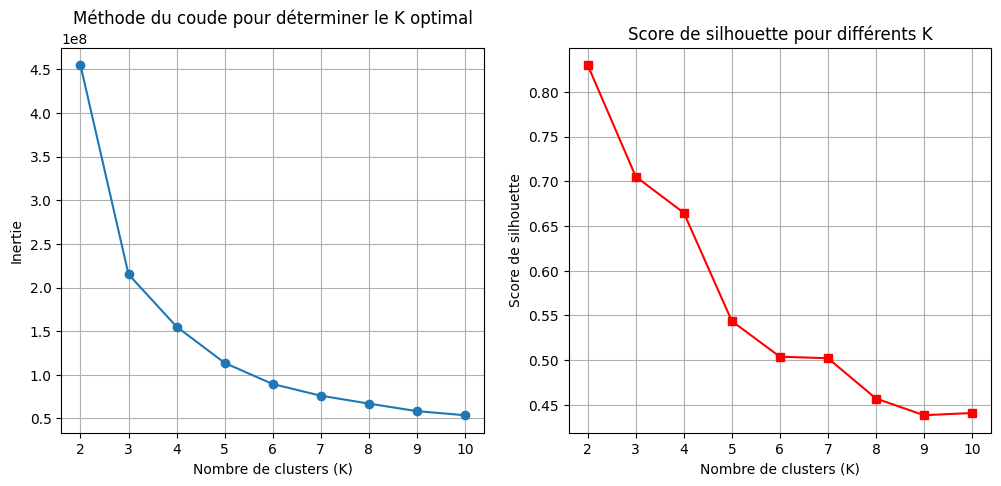

In [ ]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.utils import shuffle

# Charger l'image
imgfile = Image.open("../../images/flower.jpg")
img = np.array(imgfile)

# Redimensionner l'image en un tableau 2D (chaque ligne est un pixel et chaque colonne est un canal de couleur)
pixels = img.reshape(-1, 3)

# Échantillonner un sous-ensemble de pixels (par exemple, 10 000 pixels)
sample_size = min(10000, pixels.shape[0])  # Ajuster la taille de l'échantillon selon les besoins
pixels_sampled = shuffle(pixels, random_state=42)[:sample_size]

# Listes pour stocker les valeurs d'inertie et les scores de silhouette
inertia_values = []
silhouette_scores = []

# Essayer différentes tailles de clusters de 2 à 10 (le score de silhouette n'est pas défini pour k=1)
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, n_init=10)
    kmeans.fit(pixels)
    
    # Stocker l'inertie
    inertia_values.append(kmeans.inertia_)
    
    # Calculer le score de silhouette uniquement sur les pixels échantillonnés  
    score = silhouette_score(pixels_sampled, kmeans.predict(pixels_sampled))

    silhouette_scores.append(score)

# Tracer la méthode du coude (Inertie)
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(range(2, 11), inertia_values, marker='o', label="Inertie")
plt.title('Méthode du coude pour déterminer le K optimal')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Inertie')
plt.grid(True)

# Tracer les scores de silhouette
plt.subplot(1, 2, 2)
plt.plot(range(2, 11), silhouette_scores, marker='s', color='red', label="Score de silhouette")
plt.title('Score de silhouette pour différents K')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Score de silhouette')
plt.grid(True)

plt.show()


**Question 1 : Impact de la mise à l'échelle des caractéristiques sur le clustering**

Avant d'appliquer KMeans, mettez à l'échelle les valeurs des pixels de l'image à l'aide d'un standard scaler (par exemple, `StandardScaler` de `sklearn.preprocessing`).
- Comment la mise à l'échelle des caractéristiques (pixels) affecte-t-elle les résultats de la segmentation ?
- Comparez les images segmentées avec et sans mise à l'échelle. Quelles différences observez-vous ?

**Question 2 : Comparaison complète de la qualité des clusters**

Créez une étude comparative sur plusieurs images :

1. Sélectionnez 3 images avec des caractéristiques différentes (par exemple, paysage, portrait, abstrait)
2. Pour chaque image, exécutez KMeans avec k=5 et calculez :
   - Inertie (somme des carrés intra-cluster)
   - Score de silhouette
   - Temps d'exécution

3. Créez un tableau récapitulatif :

| Image | Inertie | Score de silhouette | Temps (s) |
|-------|---------|---------------------|-----------|
| Image 1 | ? | ? | ? |
| Image 2 | ? | ? | ? |
| Image 3 | ? | ? | ? |

4. Répondez à ces questions :
   - Quelle image produit les clusters les mieux définis (score de silhouette le plus élevé) ?
   - Y a-t-il une corrélation entre la complexité de l'image et la qualité du clustering ?
   - Quelle image prend le plus de temps à clusteriser ? Pourquoi ?

**Indice:** Utilisez `time.time()` pour mesurer le temps d'exécution et `silhouette_score` de sklearn.metrics.